##      **Indian Medicinal Plants Classification**

# Downloading the Dataset
First, we need to install the Kaggle API and authenticate it to download the "Indian Medicinal Plants Images" dataset.

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d crypticfate5/medicinal-plants
!unzip medicinal-plants.zip -d medicinal-plants-dataset

Streaming output truncated to the last 5000 lines.
  inflating: medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5611.jpg  
  inflating: medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5612.jpg  
  inflating: medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5613.jpg  
  inflating: medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5614.jpg  
  inflating: medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5615.jpg  
  inflating: medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5616.jpg  
  inflating: medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5617.jpg  
  inflating: medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/

# Creating CSV files for train and test dataset :-

we are pre-processing the data and creating train_data.csv  and test_data.csv file with columns image_path and label for further processing:-


In [3]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Directories for the dataset
dataset_dir1 = '/content/medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset'
dataset_dir2 = '/content/medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset'

# Initialize lists to hold image paths and labels
image_paths = []
labels = []

# Function to process the directory
def process_directory(directory, label_list, path_list):
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for image_name in os.listdir(label_dir):
                if image_name.endswith('.jpg') or image_name.endswith('.png'):
                    image_path = os.path.join(label_dir, image_name)
                    path_list.append(image_path)
                    label_list.append(label)

# Process the dataset directory
process_directory(dataset_dir1, labels, image_paths)
process_directory(dataset_dir2, labels, image_paths)

# Create DataFrame
data = {'Image_Path': image_paths, 'Label': labels}
df = pd.DataFrame(data)

# Calculate the subset size which is 10.00% of the total data
subset_size = int(0.1000 * len(df))

# Split the data to get 10.00% of the entire dataset
_, subset_df = train_test_split(df, train_size=subset_size, stratify=df['Label'], random_state=42)

# Further split the subset into train and validation sets
train_df, test_df = train_test_split(subset_df, test_size=0.1, stratify=subset_df['Label'], random_state=42)
test_df['Label'] = "Unknown"

# Save to CSV
train_csv_path = '/content/medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/train_data.csv'
test_csv_path = '/content/medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/test_data.csv'

train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

print("CSV files for train and validation data saved successfully!")

CSV files for train and validation data saved successfully!


# Importing Libraries :-

we need to import machine learning related API's for image processing , manipulating layers and model Xception , InceptionV3 and ResNet50V2 with pre-trained weights , pandas for reading csv files into dataframes and Matplotlib for creating visualizations, such as line plots, bar charts :-

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import Xception  , DenseNet121 , MobileNetV2 , ResNet50V2  , InceptionV3
from keras import layers, models, optimizers

# Creating Data Generators for Image Classification
This code snippet summarizes the process of creating data generators for training and validation sets . It includes setting up image data augmentation for the training set (train_datagen) and scaling for the testing set (test_datagen), defining the batch size and target image size, and loading the dataset using the flow_from_directory method with categorical class mode for image classification tasks.

In [5]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/train_data.csv')

train_df, val_df = train_test_split(df, train_size=0.9, test_size=0.1, random_state=42)
num_classes = len(df['Label'].unique())
print(num_classes)

99


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2
)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
target_size = (224, 224)

In [7]:
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col='Image_Path',
                                                    y_col='Label',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(dataframe=val_df,
                                                        x_col='Image_Path',
                                                        y_col='Label',
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 9363 validated image filenames belonging to 99 classes.
Found 1041 validated image filenames belonging to 99 classes.


# Exploratory Data Analysis

In [8]:
# Understand the dataset
print(train_df.head())
print(train_df.shape)
print(train_df.info())
print(train_df.describe())

                                             Image_Path      Label
9059  /content/medicinal-plants-dataset/Indian Medic...  Parijatha
6572  /content/medicinal-plants-dataset/Indian Medic...   Nagadali
9512  /content/medicinal-plants-dataset/Indian Medic...       Rose
2611  /content/medicinal-plants-dataset/Indian Medic...    Insulin
4328  /content/medicinal-plants-dataset/Indian Medic...   Aloevera
(9363, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 9363 entries, 9059 to 7270
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  9363 non-null   object
 1   Label       9363 non-null   object
dtypes: object(2)
memory usage: 219.4+ KB
None
                                               Image_Path   Label
count                                                9363    9363
unique                                               9363      99
top     /content/medicinal-plants-dataset/Indian Medic...  Castor
freq         

## Bar - Chart
 A bar chart showing the distribution of labels in the training dataset. It visually represents the frequency of each label category, providing an overview of how the labels are distributed across the dataset.

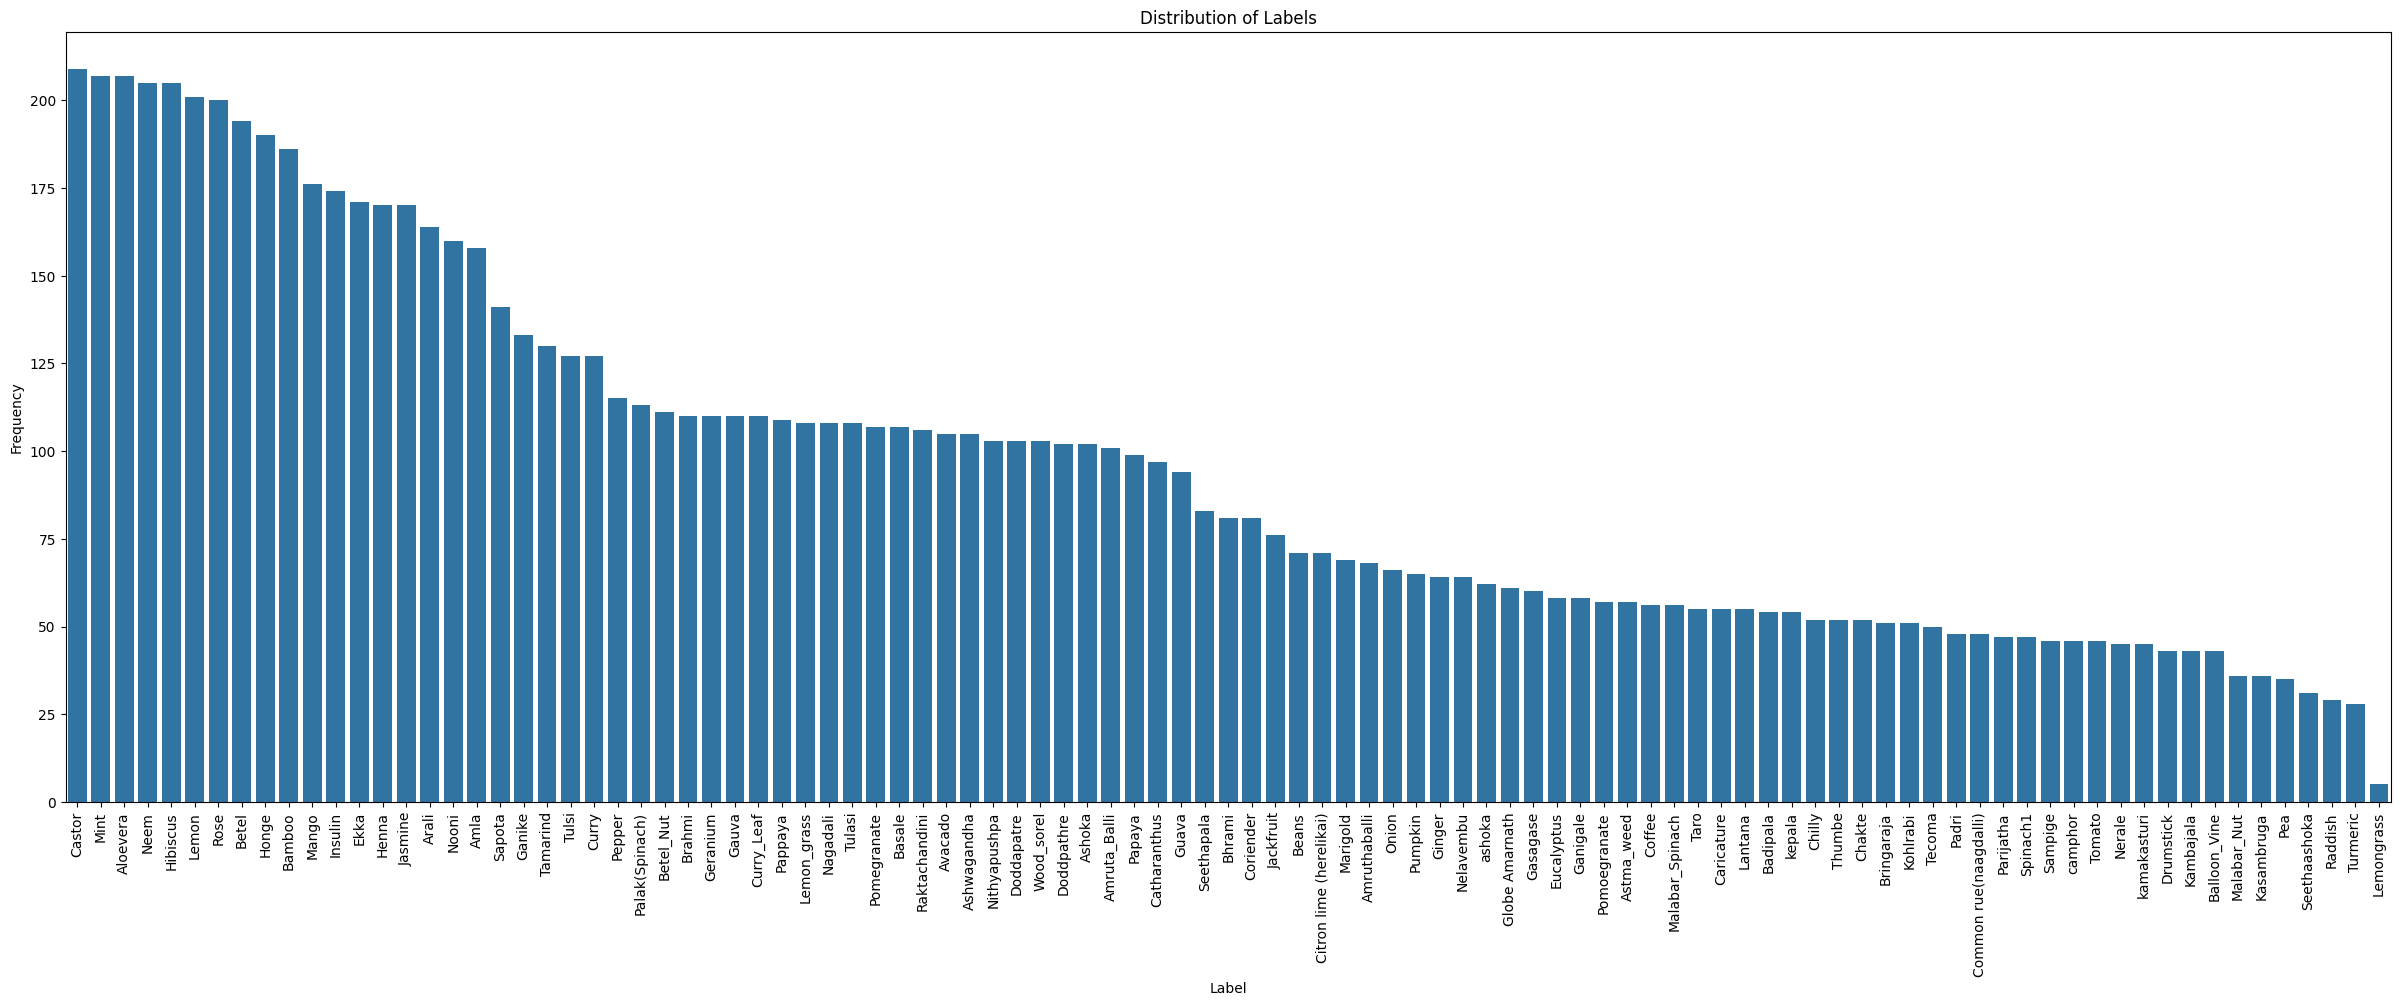

In [9]:
# Bar chart for label distribution
plt.figure(figsize=(30, 10))
sns.countplot(data=train_df, x='Label', order=train_df['Label'].value_counts().index)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

## Pie Chart :-
A pie chart illustrating the distribution of labels in the training dataset. The percentage value displayed on each segment indicates the relative frequency of each label category.

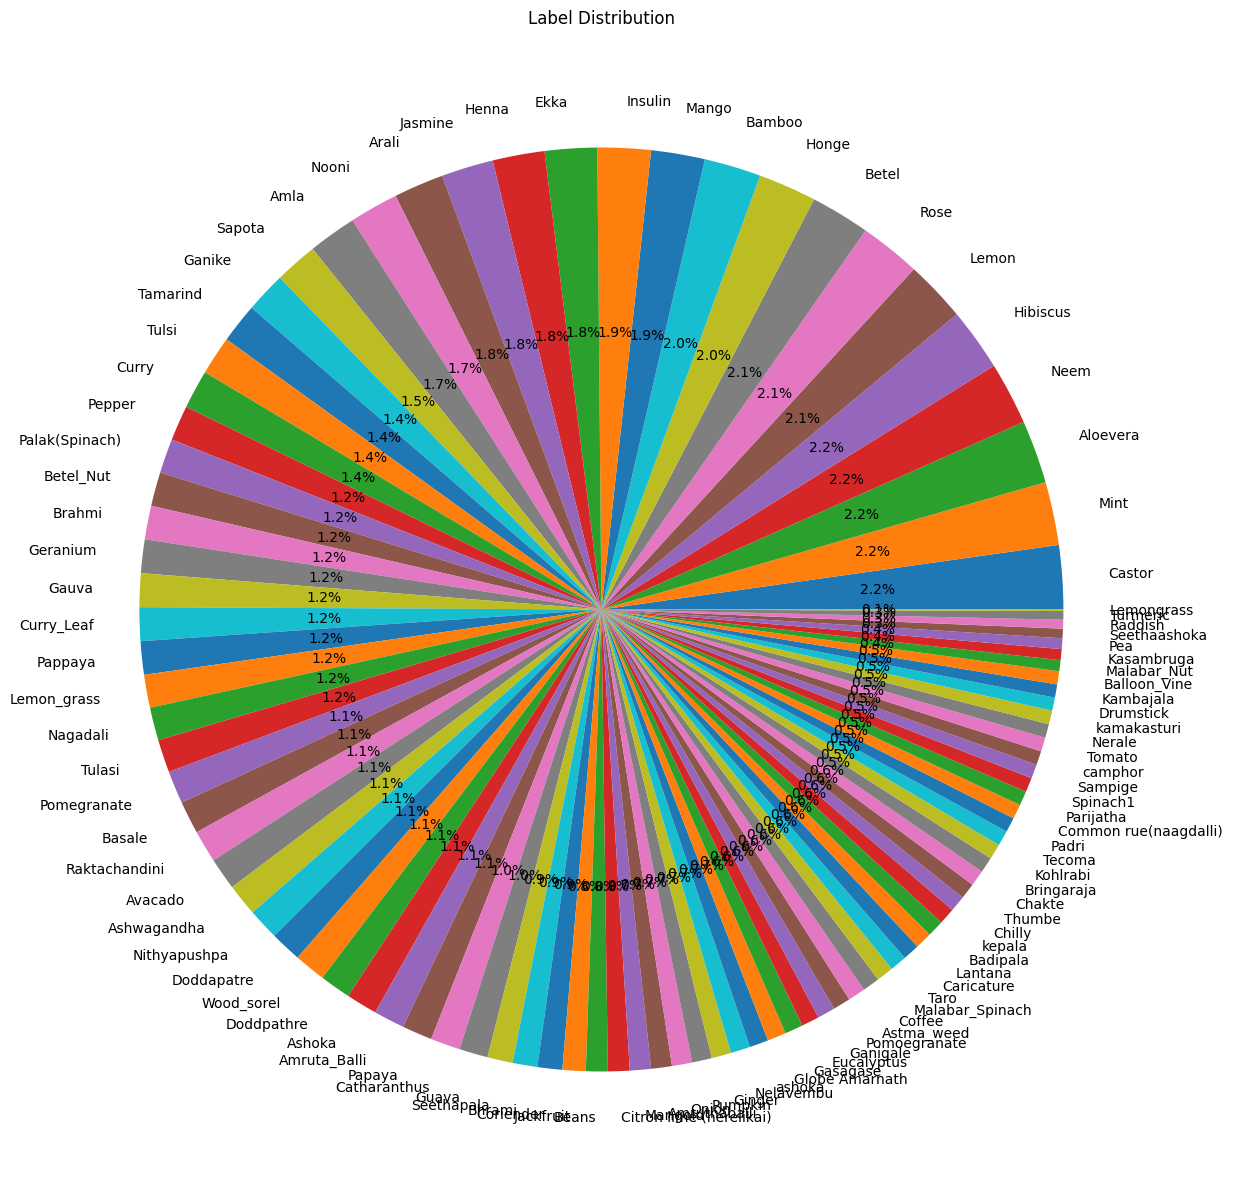

In [10]:
# Pie chart for label distribution
plt.figure(figsize=(15, 15))
train_df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Label Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

## Image paths distribution :-
 Visualizes the distribution of top 20 image paths by label, displays unique values in categorical columns.

Number of unique image paths: 9363


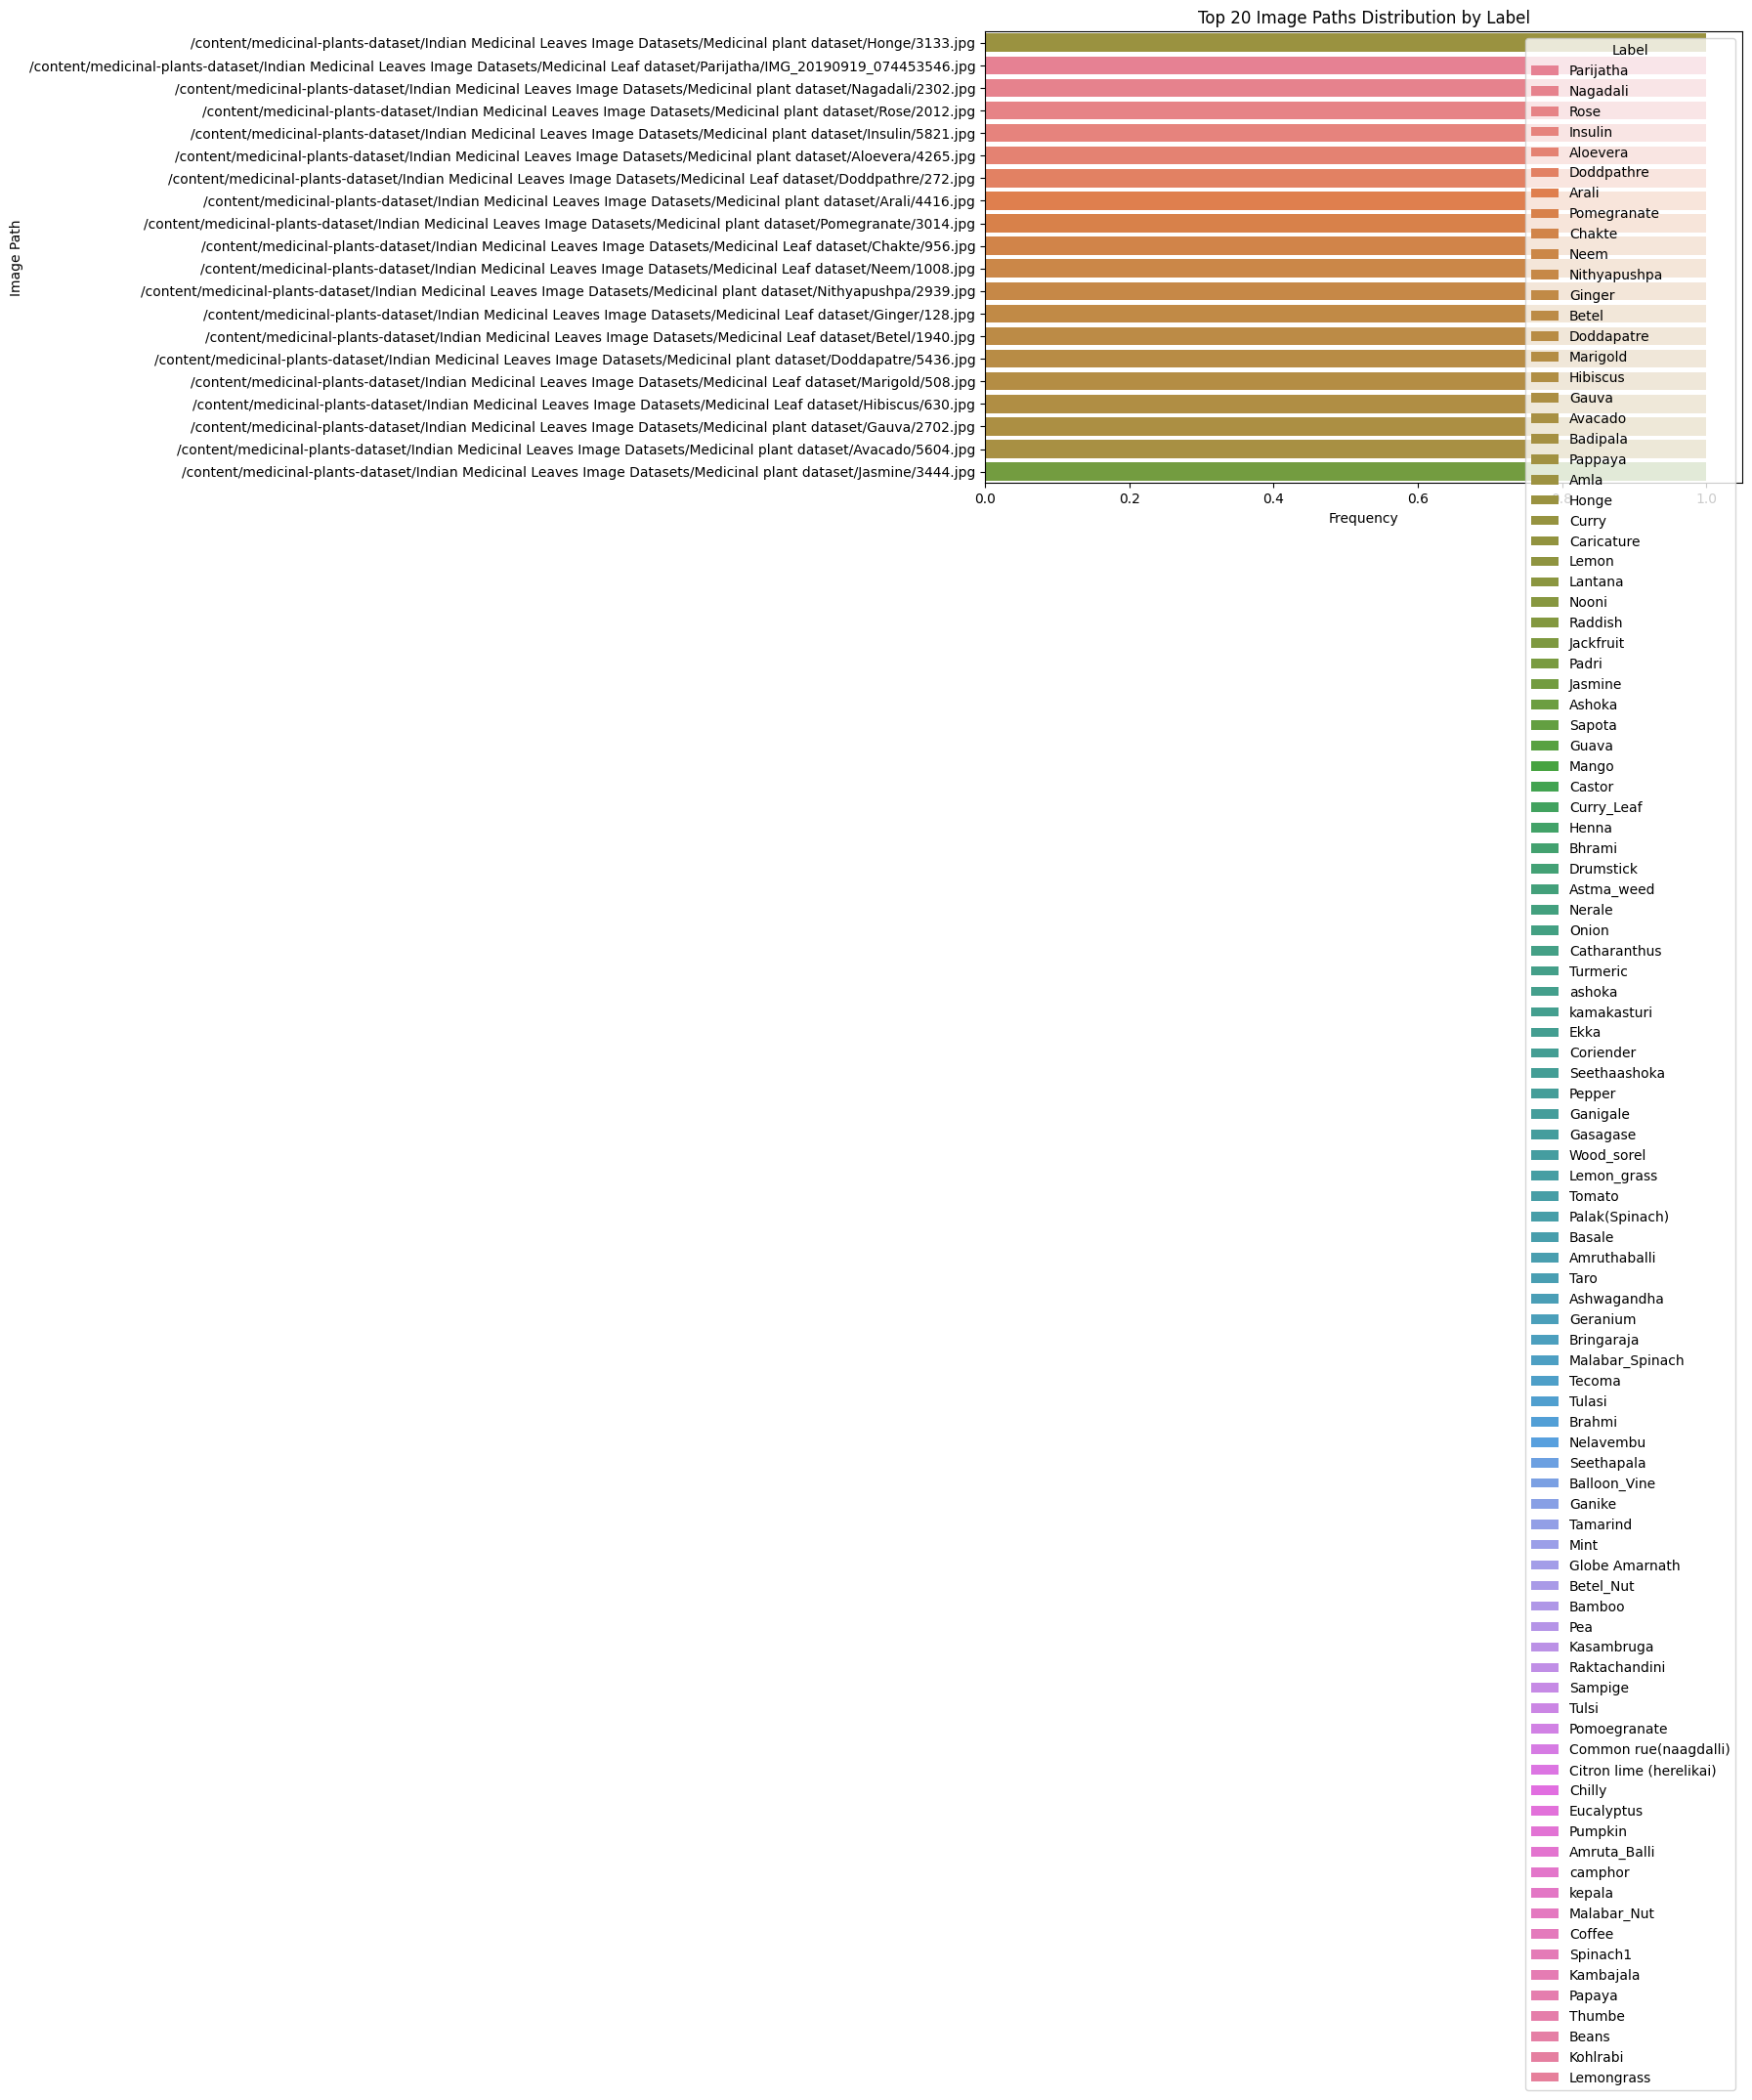

Column Image_Path has 9363 unique values.
Column Label has 99 unique values.


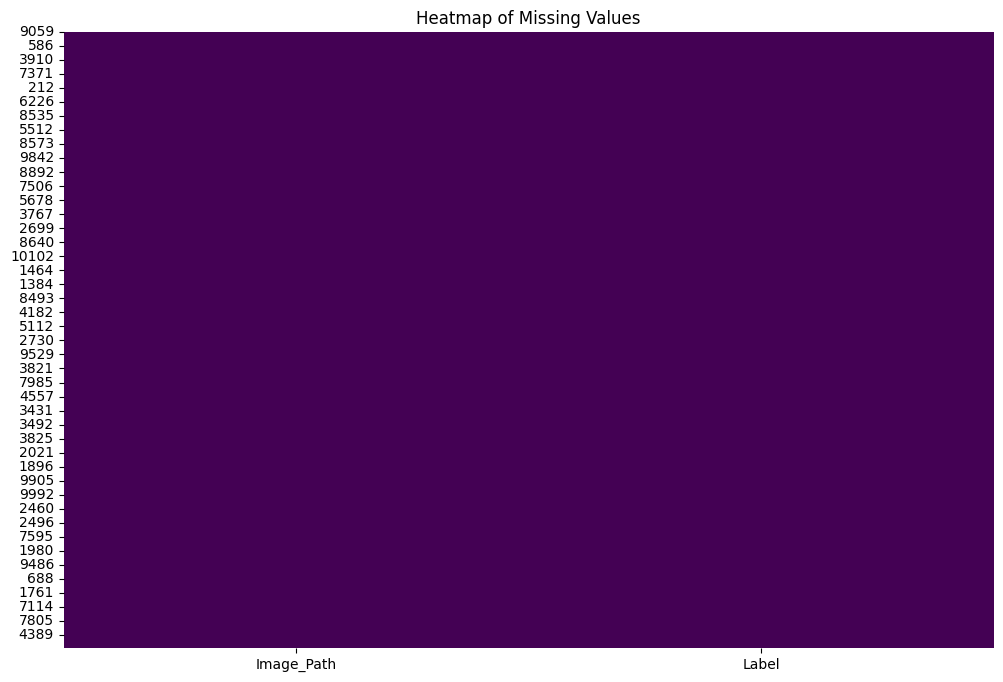

Label
Castor          209
Mint            207
Aloevera        207
Neem            205
Hibiscus        205
               ... 
Pea              35
Seethaashoka     31
Raddish          29
Turmeric         28
Lemongrass        5
Name: count, Length: 99, dtype: int64


In [11]:
# Count unique image paths
unique_paths = train_df['Image_Path'].nunique()
print(f"Number of unique image paths: {unique_paths}")

# Image paths distribution by label (top 20 paths for readability)
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, y='Image_Path', hue='Label', order=train_df['Image_Path'].value_counts().index[:20])
plt.title('Top 20 Image Paths Distribution by Label')
plt.xlabel('Frequency')
plt.ylabel('Image Path')
plt.show()

# Unique values for each categorical column
for column in train_df.select_dtypes(include=['object']).columns:
    unique_values = train_df[column].nunique()
    print(f"Column {column} has {unique_values} unique values.")

# Missing values heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Label counts summary
label_counts = train_df['Label'].value_counts()
print(label_counts)

In [12]:
# Data Cleaning
print(train_df.isnull().sum())
train_df.fillna(method='ffill', inplace=True)
print(train_df.duplicated().sum())
train_df.drop_duplicates(inplace=True)

Image_Path    0
Label         0
dtype: int64
0


# Customizing model according to our usecase
This code snippet summarizes the process of creating a custom keras categorical classification model in Keras. It involves loading the pre-trained Xception , VGG16 and ResNet50  model, freezing its layers, adding custom layers for classification, compiling the model, shuffling the training data, and training the model. Finally, the trained model is saved as an HDF5 file .

In [13]:
from keras import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Dense, GlobalAveragePooling2D

from keras.layers import Dropout

def create_model(base_model, input_shape, num_classes):
    base_model.trainable = True  # Unfreeze the base model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [14]:
def model_training (base_models):
  # Directory to save the models
  save_dir = 'saved_models'
  if not os.path.exists(save_dir):
      os.makedirs(save_dir)

  # Adjustments for ResNet50
  # Train and evaluate each model
  histories = {}
  for base_model, input_shape, model_name in base_models:
      # Resize data if necessary (dummy data, so not applicable here)
      if input_shape != (224, 224, 3):
          # Resize X_train and X_val to the required input_shape
          # This is just a placeholder, implement actual resizing if needed
          pass

      # Create the model
      model = create_model(base_model, input_shape, num_classes)

      if model_name == 'ResNet50':
          # Unfreeze more layers for ResNet50 and adjust learning rate
          for layer in model.layers[-30:]:
              layer.trainable = True
          epochs = 13
          optimizer = optimizers.Adam(learning_rate=0.0001)
      else:
          epochs = 13
          optimizer = optimizers.Adam()

      # Compile the model
      model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

      print(f'Training {model_name}...')
      history = train_and_evaluate(model, train_generator, validation_generator, model_name, epochs=epochs)
      histories[model_name] = history

      # Saving the model after training
      model.save(os.path.join(save_dir, f'{model_name}_saved.h5'))
      print(f'Saved {model_name} model to {save_dir}/{model_name}_saved.h5')

In [15]:
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

def train_and_evaluate(model, train_data, val_data, model_name, epochs=10):
    # Compile the model
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model with the specified number of epochs
    history = model.fit(train_data,
                        validation_data=val_data,
                        steps_per_epoch=len(train_data),
                        epochs=epochs,
                        callbacks=[early_stopping])

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(val_data)
    print(f'{model_name} Validation Accuracy: {val_accuracy:.4f}')

    # Plot training history
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title(f'{model_name} Accuracy')
    plt.show()

    # Get the true labels and predictions
    val_data.reset()  # Reset the generator
    Y_pred = model.predict(val_data)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = val_data.classes

    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(30, 30))  # Increase the size of the plot significantly
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_data.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), xticks_rotation='vertical')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    return history

# Loading the Base-Model
This code snippet defines Xception , ResNet50 and VGG16 base model in Keras. The model is configured with an input shape of (224, 224, 3) for VGG16 & ResNet50 and input shape of (299 , 299 , 3) for Xception to match the size and channels of the images in the dataset. It includes all layers of the MobileNetV2 model up to the final fully connected layers but excludes the last fully connected layer, which is often customized for specific tasks.

9406464/9406464 [==============================] - 1s 0us/step
Training MobileNetV2...
Epoch 1/13
293/293 [==============================] - 397s 1s/step - loss: 4.4598 - accuracy: 0.0406 - val_loss: 3.9944 - val_accuracy: 0.1489
Epoch 2/13
293/293 [==============================] - 362s 1s/step - loss: 3.5507 - accuracy: 0.1915 - val_loss: 2.9161 - val_accuracy: 0.3410
Epoch 3/13
293/293 [==============================] - 349s 1s/step - loss: 2.6101 - accuracy: 0.3849 - val_loss: 2.0665 - val_accuracy: 0.5005
Epoch 4/13
293/293 [==============================] - 344s 1s/step - loss: 1.9676 - accuracy: 0.5233 - val_loss: 1.6450 - val_accuracy: 0.5889
Epoch 5/13
293/293 [==============================] - 366s 1s/step - loss: 1.5491 - accuracy: 0.6197 - val_loss: 1.2498 - val_accuracy: 0.6763
Epoch 6/13
293/293 [==============================] - 362s 1s/step - loss: 1.2295 - accuracy: 0.6850 - val_loss: 1.0264 - val_accuracy: 0.7435
Epoch 7/13
293/293 [==============================] - 3

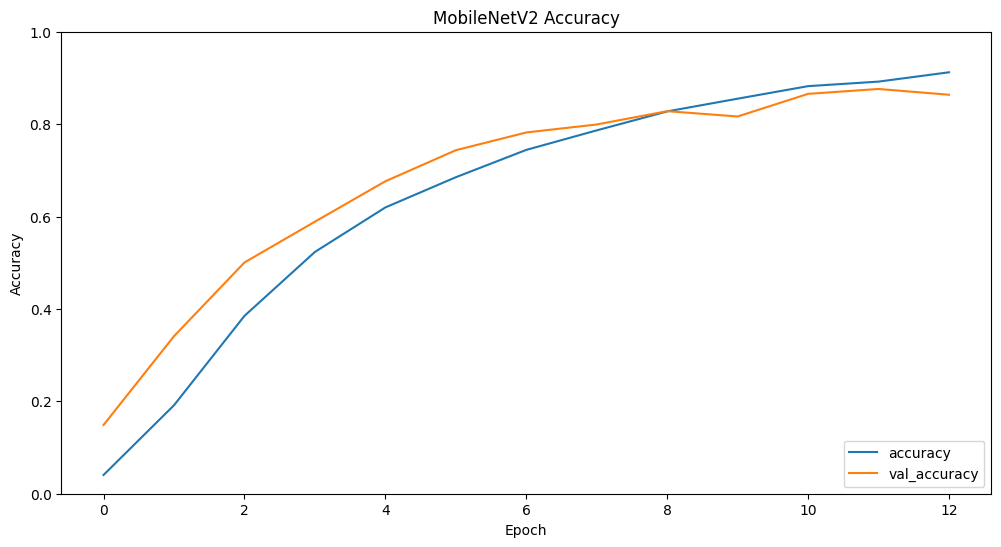

33/33 [==============================] - 22s 626ms/step


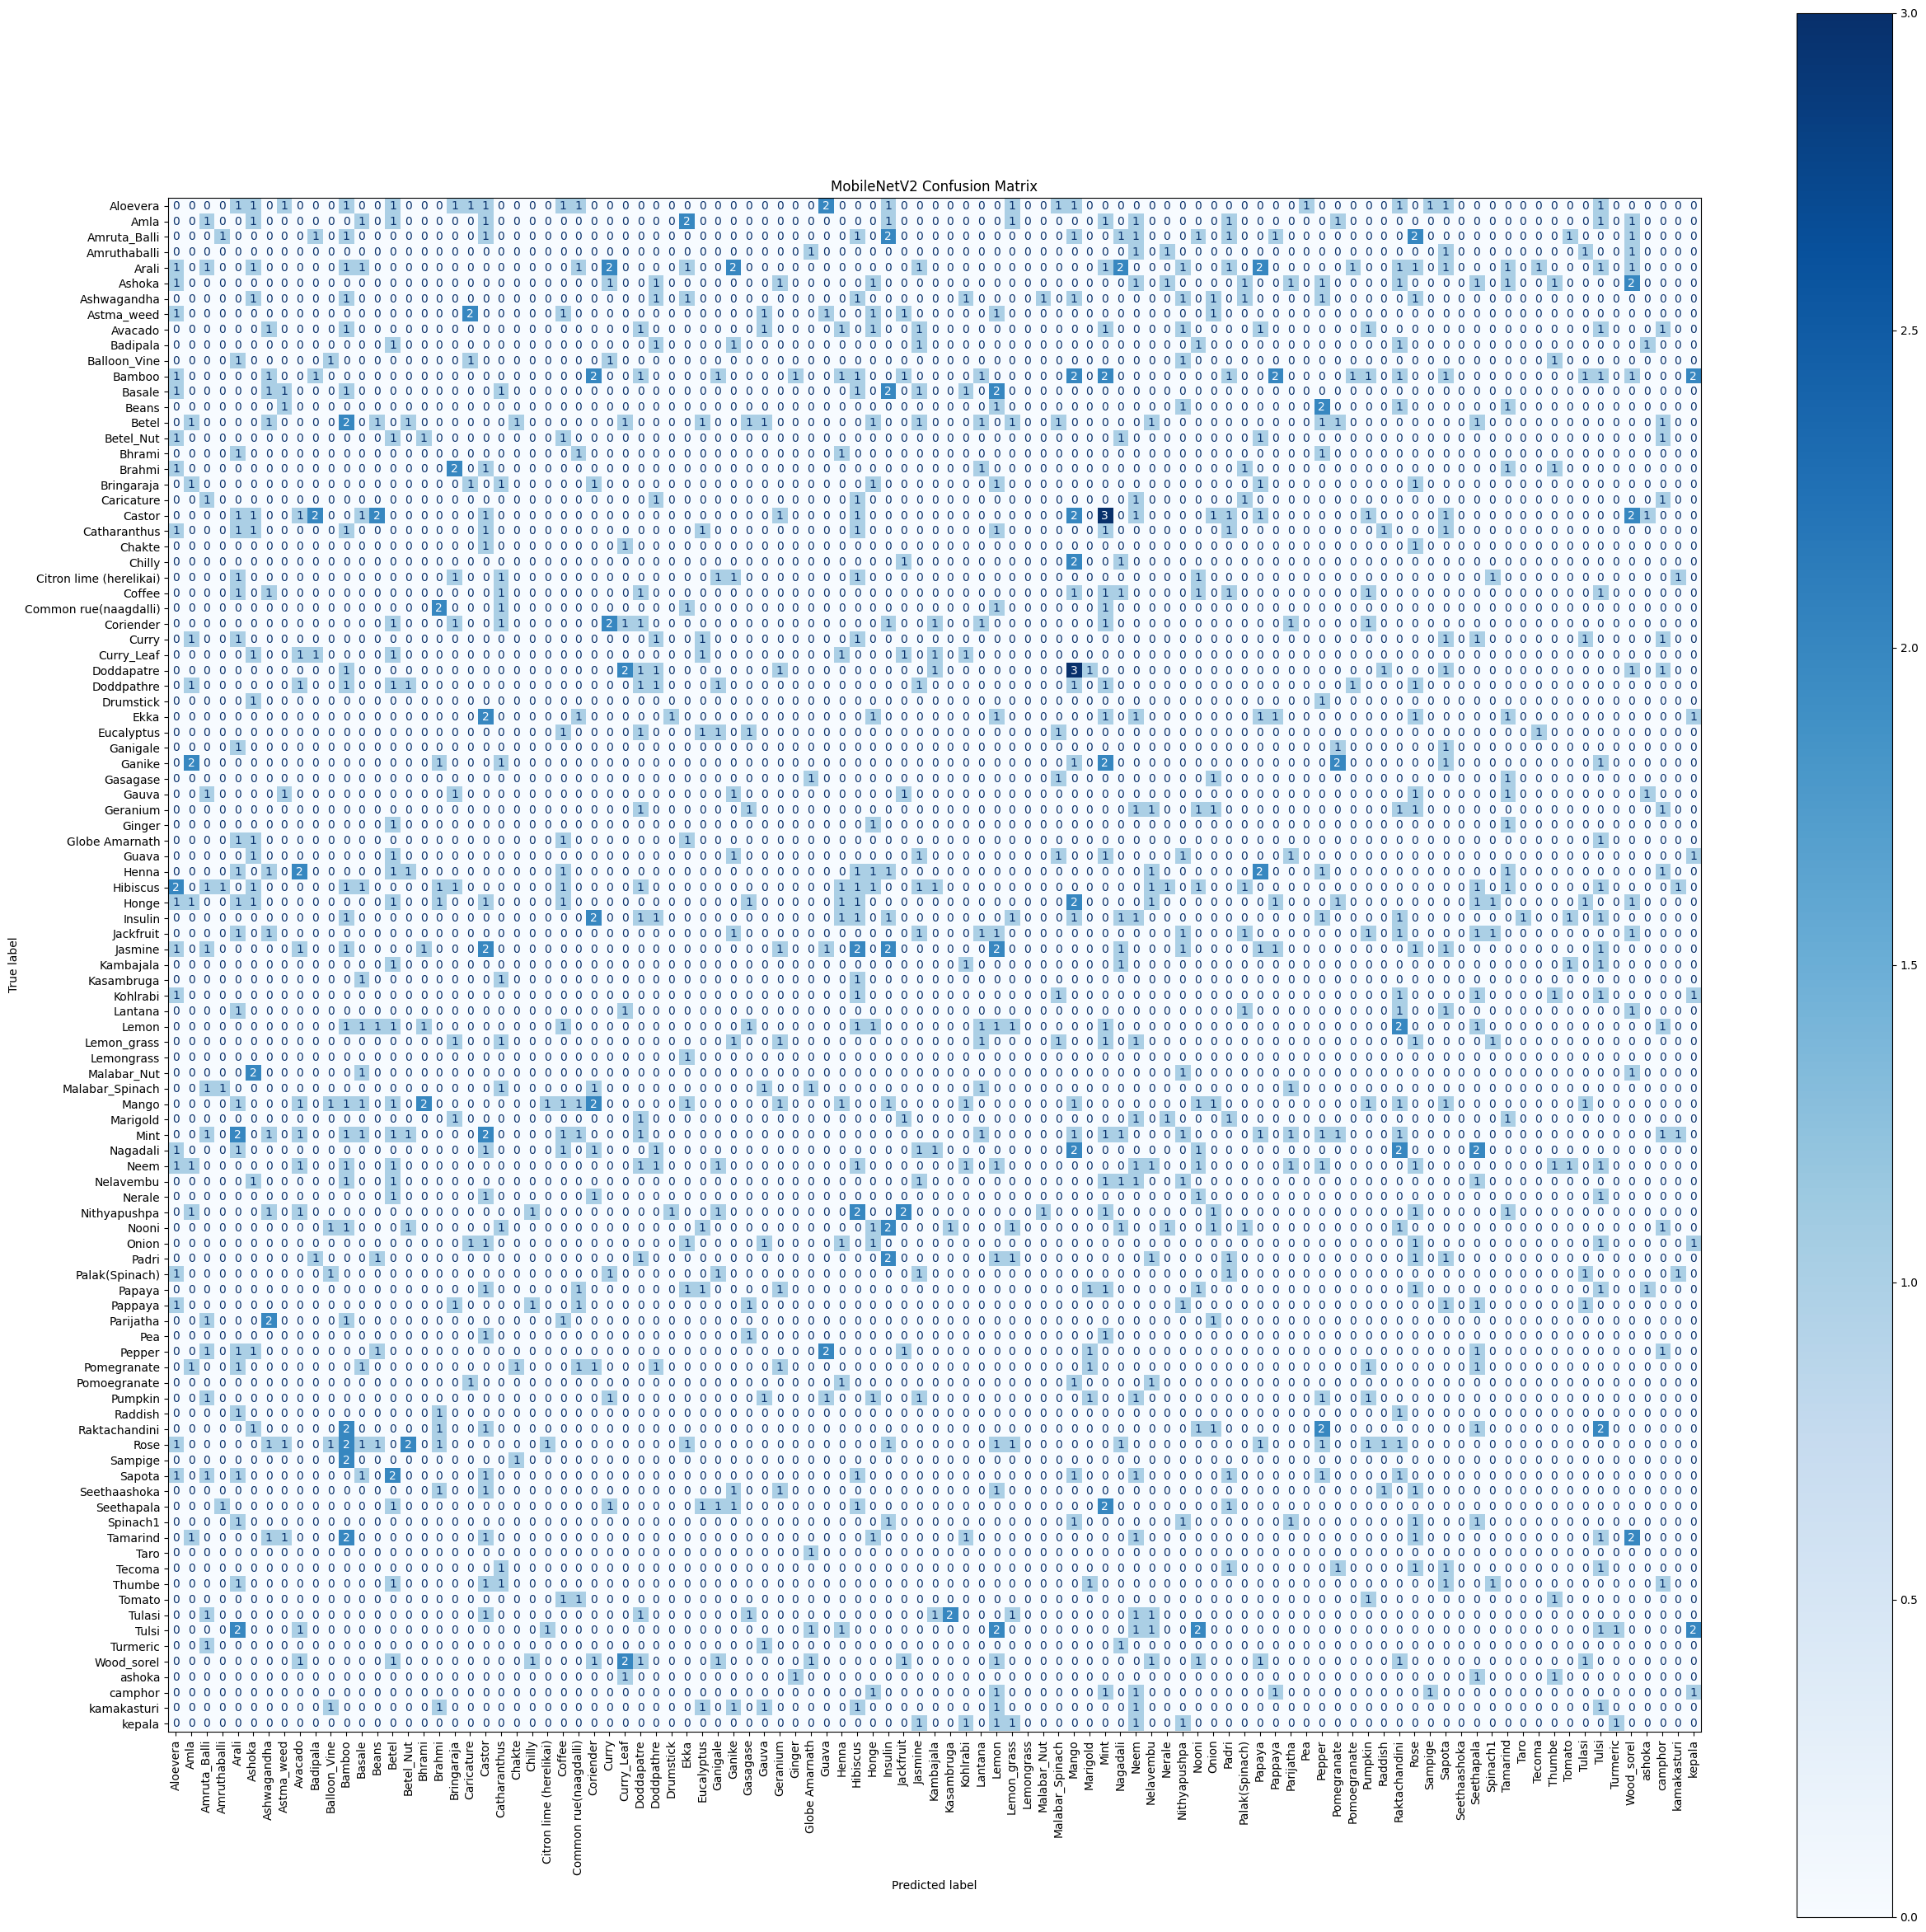

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved MobileNetV2 model to saved_models/MobileNetV2_saved.h5


In [ ]:
# List of base models with their respective input shapes
base_models1 = [
    (MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'MobileNetV2'),
]
model_training(base_models1)

87910968/87910968 [==============================] - 3s 0us/step
Training InceptionV3...
Epoch 1/13
293/293 [==============================] - 406s 1s/step - loss: 4.3267 - accuracy: 0.0607 - val_loss: 3.3463 - val_accuracy: 0.2843
Epoch 2/13
293/293 [==============================] - 361s 1s/step - loss: 3.0166 - accuracy: 0.3250 - val_loss: 2.0730 - val_accuracy: 0.5552
Epoch 3/13
293/293 [==============================] - 359s 1s/step - loss: 2.0617 - accuracy: 0.5252 - val_loss: 1.3587 - val_accuracy: 0.6868
Epoch 4/13
293/293 [==============================] - 359s 1s/step - loss: 1.4269 - accuracy: 0.6674 - val_loss: 0.9062 - val_accuracy: 0.7896
Epoch 5/13
293/293 [==============================] - 362s 1s/step - loss: 1.0177 - accuracy: 0.7557 - val_loss: 1.1570 - val_accuracy: 0.7627
Epoch 6/13
293/293 [==============================] - 363s 1s/step - loss: 0.7695 - accuracy: 0.8136 - val_loss: 0.8740 - val_accuracy: 0.7819
Epoch 7/13
293/293 [==============================] -

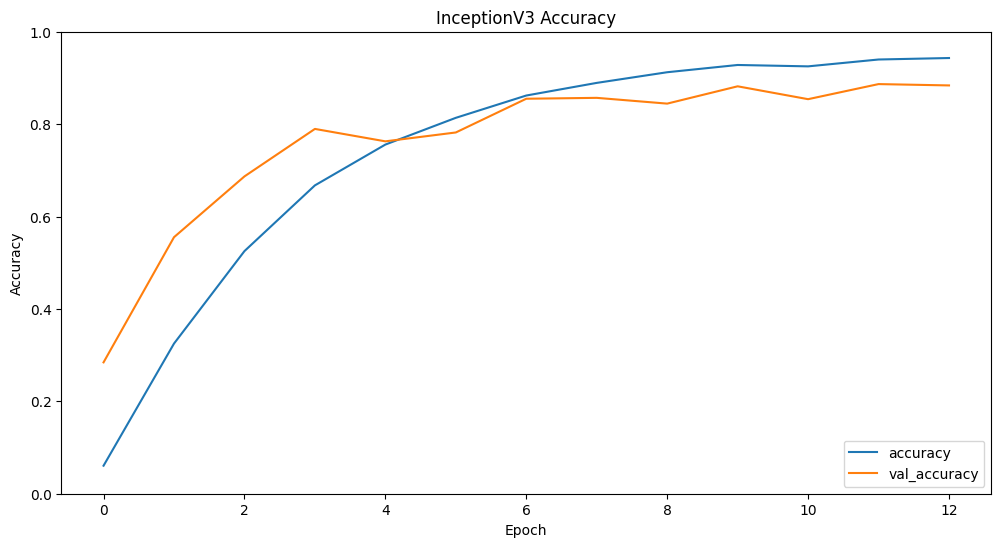

33/33 [==============================] - 23s 662ms/step


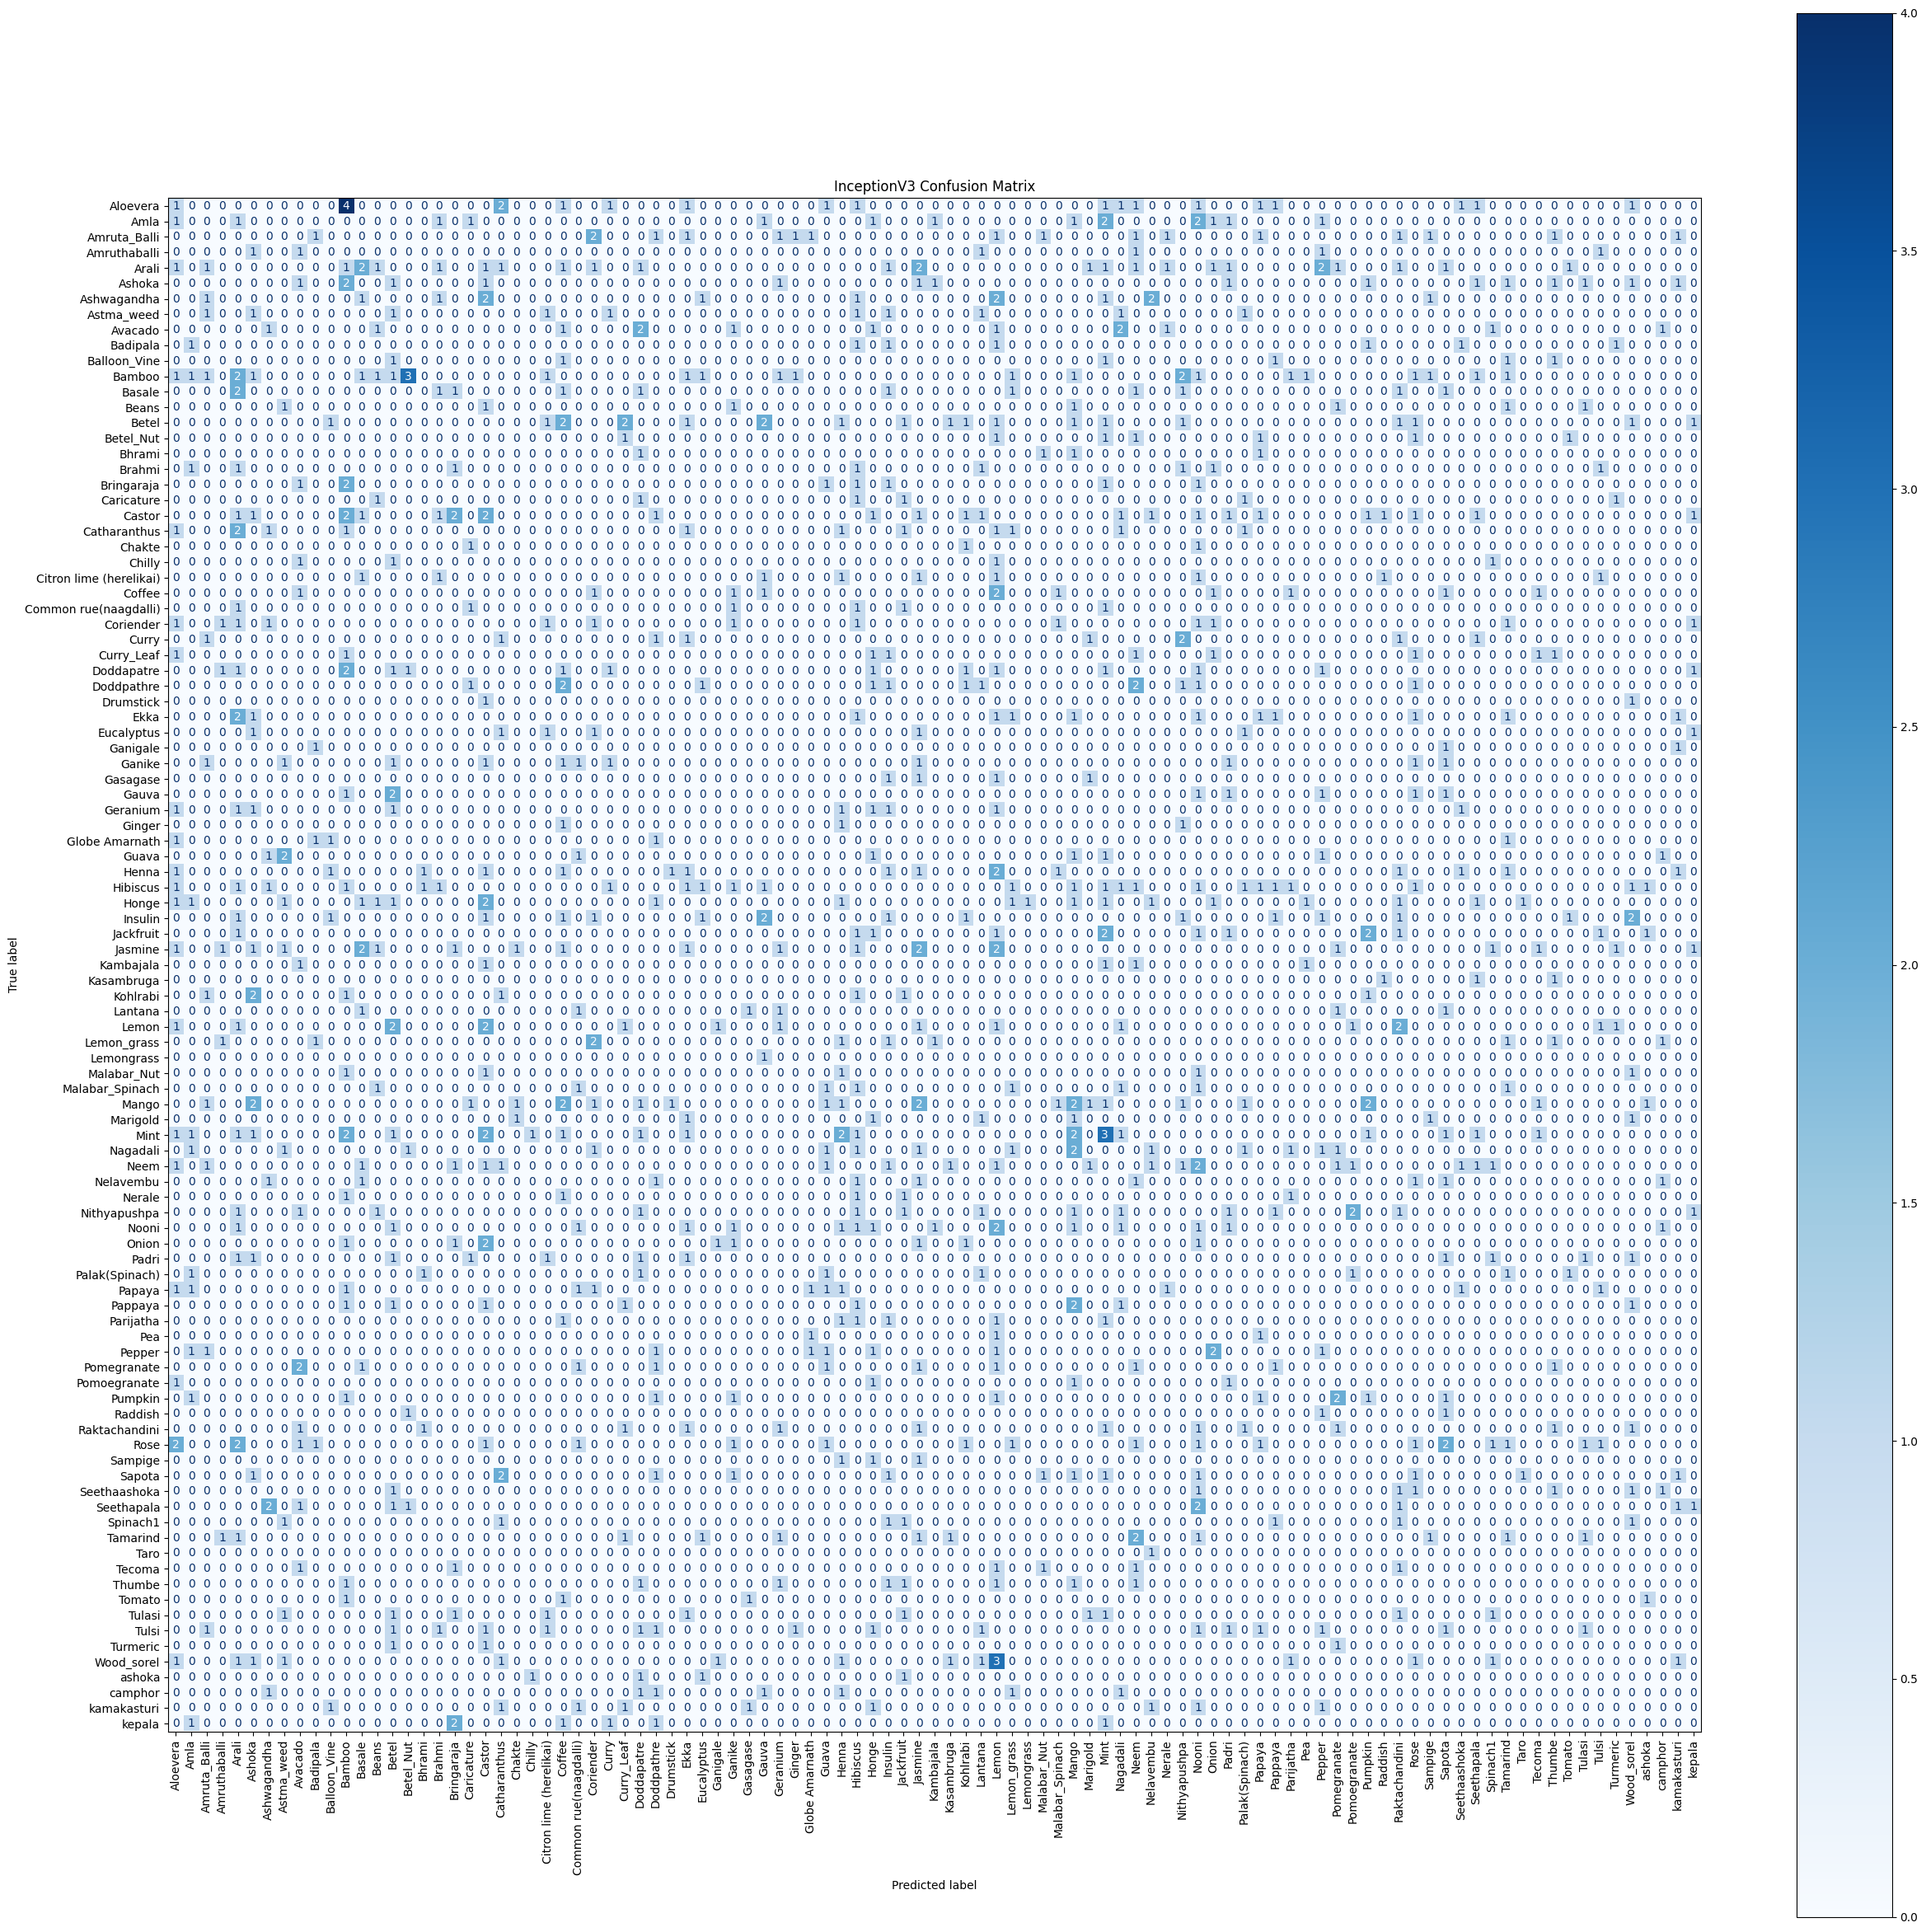

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved InceptionV3 model to saved_models/InceptionV3_saved.h5


In [ ]:
base_models2 = [
  (InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3)), (299, 299, 3), 'InceptionV3')
]
model_training (base_models2)

83683744/83683744 [==============================] - 3s 0us/step
Training Xception...
Epoch 1/13
293/293 [==============================] - 446s 1s/step - loss: 4.1805 - accuracy: 0.0882 - val_loss: 3.0804 - val_accuracy: 0.3477
Epoch 2/13
293/293 [==============================] - 390s 1s/step - loss: 2.7948 - accuracy: 0.3614 - val_loss: 1.8915 - val_accuracy: 0.5821
Epoch 3/13
293/293 [==============================] - 383s 1s/step - loss: 1.8564 - accuracy: 0.5759 - val_loss: 1.2569 - val_accuracy: 0.7185
Epoch 4/13
293/293 [==============================] - 380s 1s/step - loss: 1.2378 - accuracy: 0.7097 - val_loss: 0.7811 - val_accuracy: 0.8165
Epoch 5/13
293/293 [==============================] - 375s 1s/step - loss: 0.7977 - accuracy: 0.8045 - val_loss: 0.4745 - val_accuracy: 0.8838
Epoch 6/13
293/293 [==============================] - 378s 1s/step - loss: 0.5275 - accuracy: 0.8669 - val_loss: 0.3898 - val_accuracy: 0.9001
Epoch 7/13
293/293 [==============================] - 38

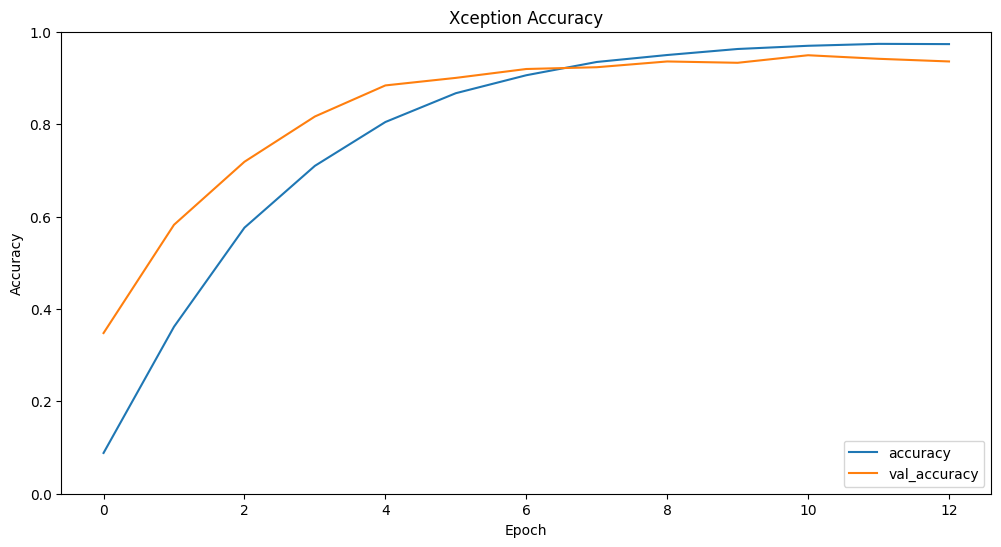

33/33 [==============================] - 24s 695ms/step


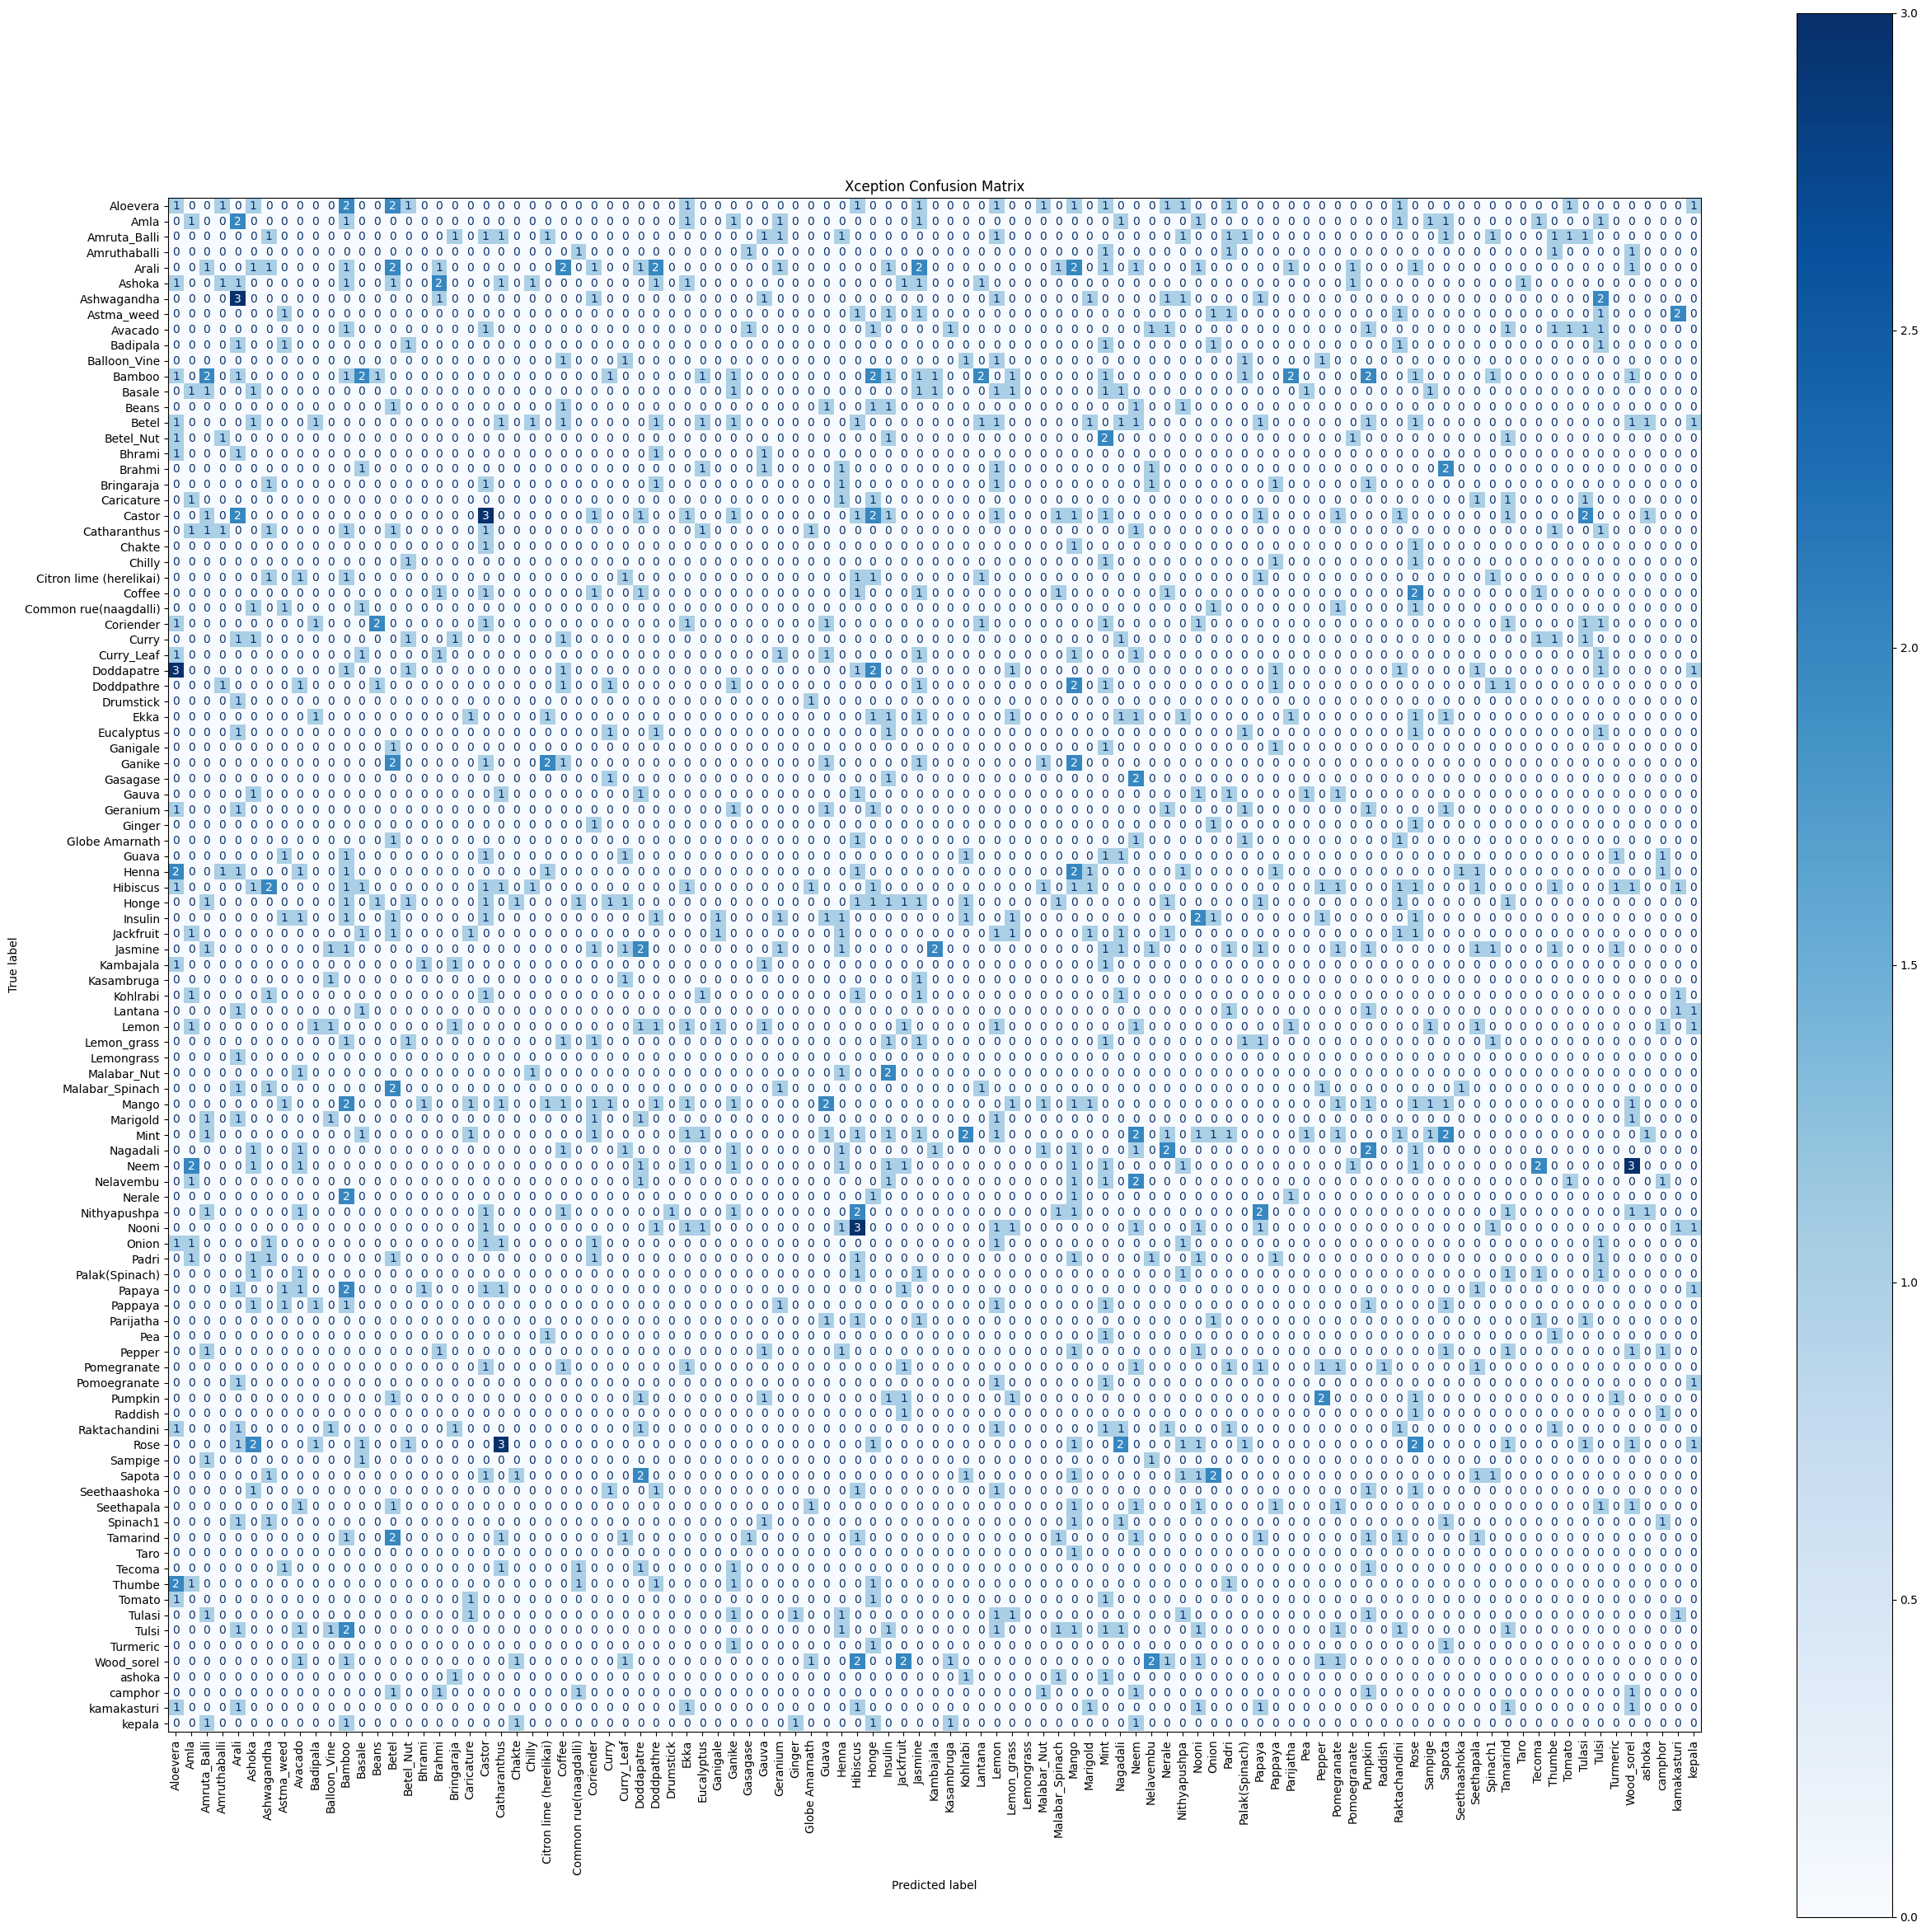

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved Xception model to saved_models/Xception_saved.h5


In [ ]:
base_models3 = [
  (Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3)), (299, 299, 3), 'Xception')
]
model_training (base_models3)

94668760/94668760 [==============================] - 3s 0us/step
Training ResNet50V2...
Epoch 1/13
293/293 [==============================] - 403s 1s/step - loss: 4.2807 - accuracy: 0.0680 - val_loss: 3.3067 - val_accuracy: 0.2767
Epoch 2/13
293/293 [==============================] - 367s 1s/step - loss: 3.0753 - accuracy: 0.3059 - val_loss: 2.1507 - val_accuracy: 0.5274
Epoch 3/13
293/293 [==============================] - 373s 1s/step - loss: 2.2045 - accuracy: 0.4946 - val_loss: 1.5564 - val_accuracy: 0.6378
Epoch 4/13
293/293 [==============================] - 372s 1s/step - loss: 1.6376 - accuracy: 0.6142 - val_loss: 1.2671 - val_accuracy: 0.7032
Epoch 5/13
293/293 [==============================] - 373s 1s/step - loss: 1.2681 - accuracy: 0.6935 - val_loss: 0.8294 - val_accuracy: 0.7963
Epoch 6/13
293/293 [==============================] - 362s 1s/step - loss: 0.9677 - accuracy: 0.7580 - val_loss: 0.8926 - val_accuracy: 0.7867
Epoch 7/13
293/293 [==============================] - 

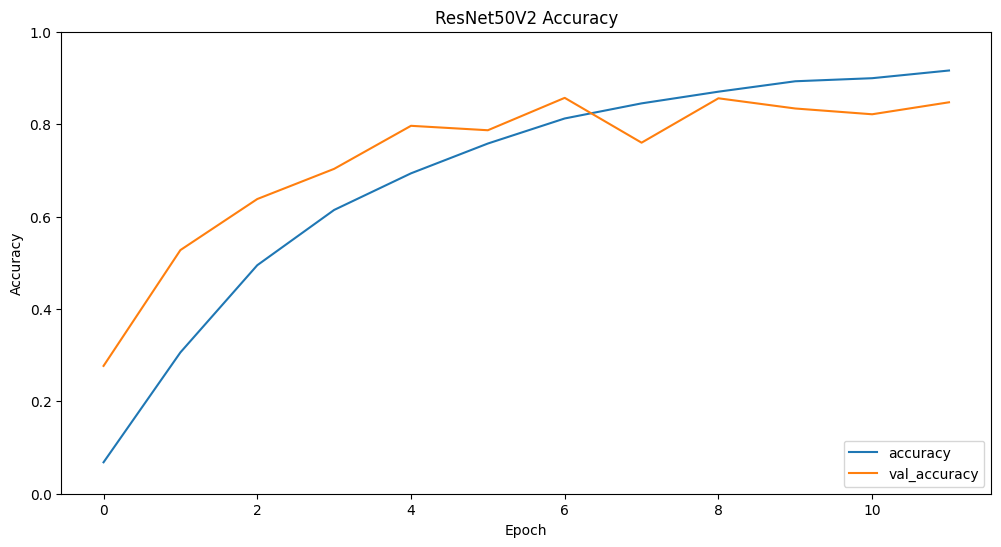

33/33 [==============================] - 21s 614ms/step


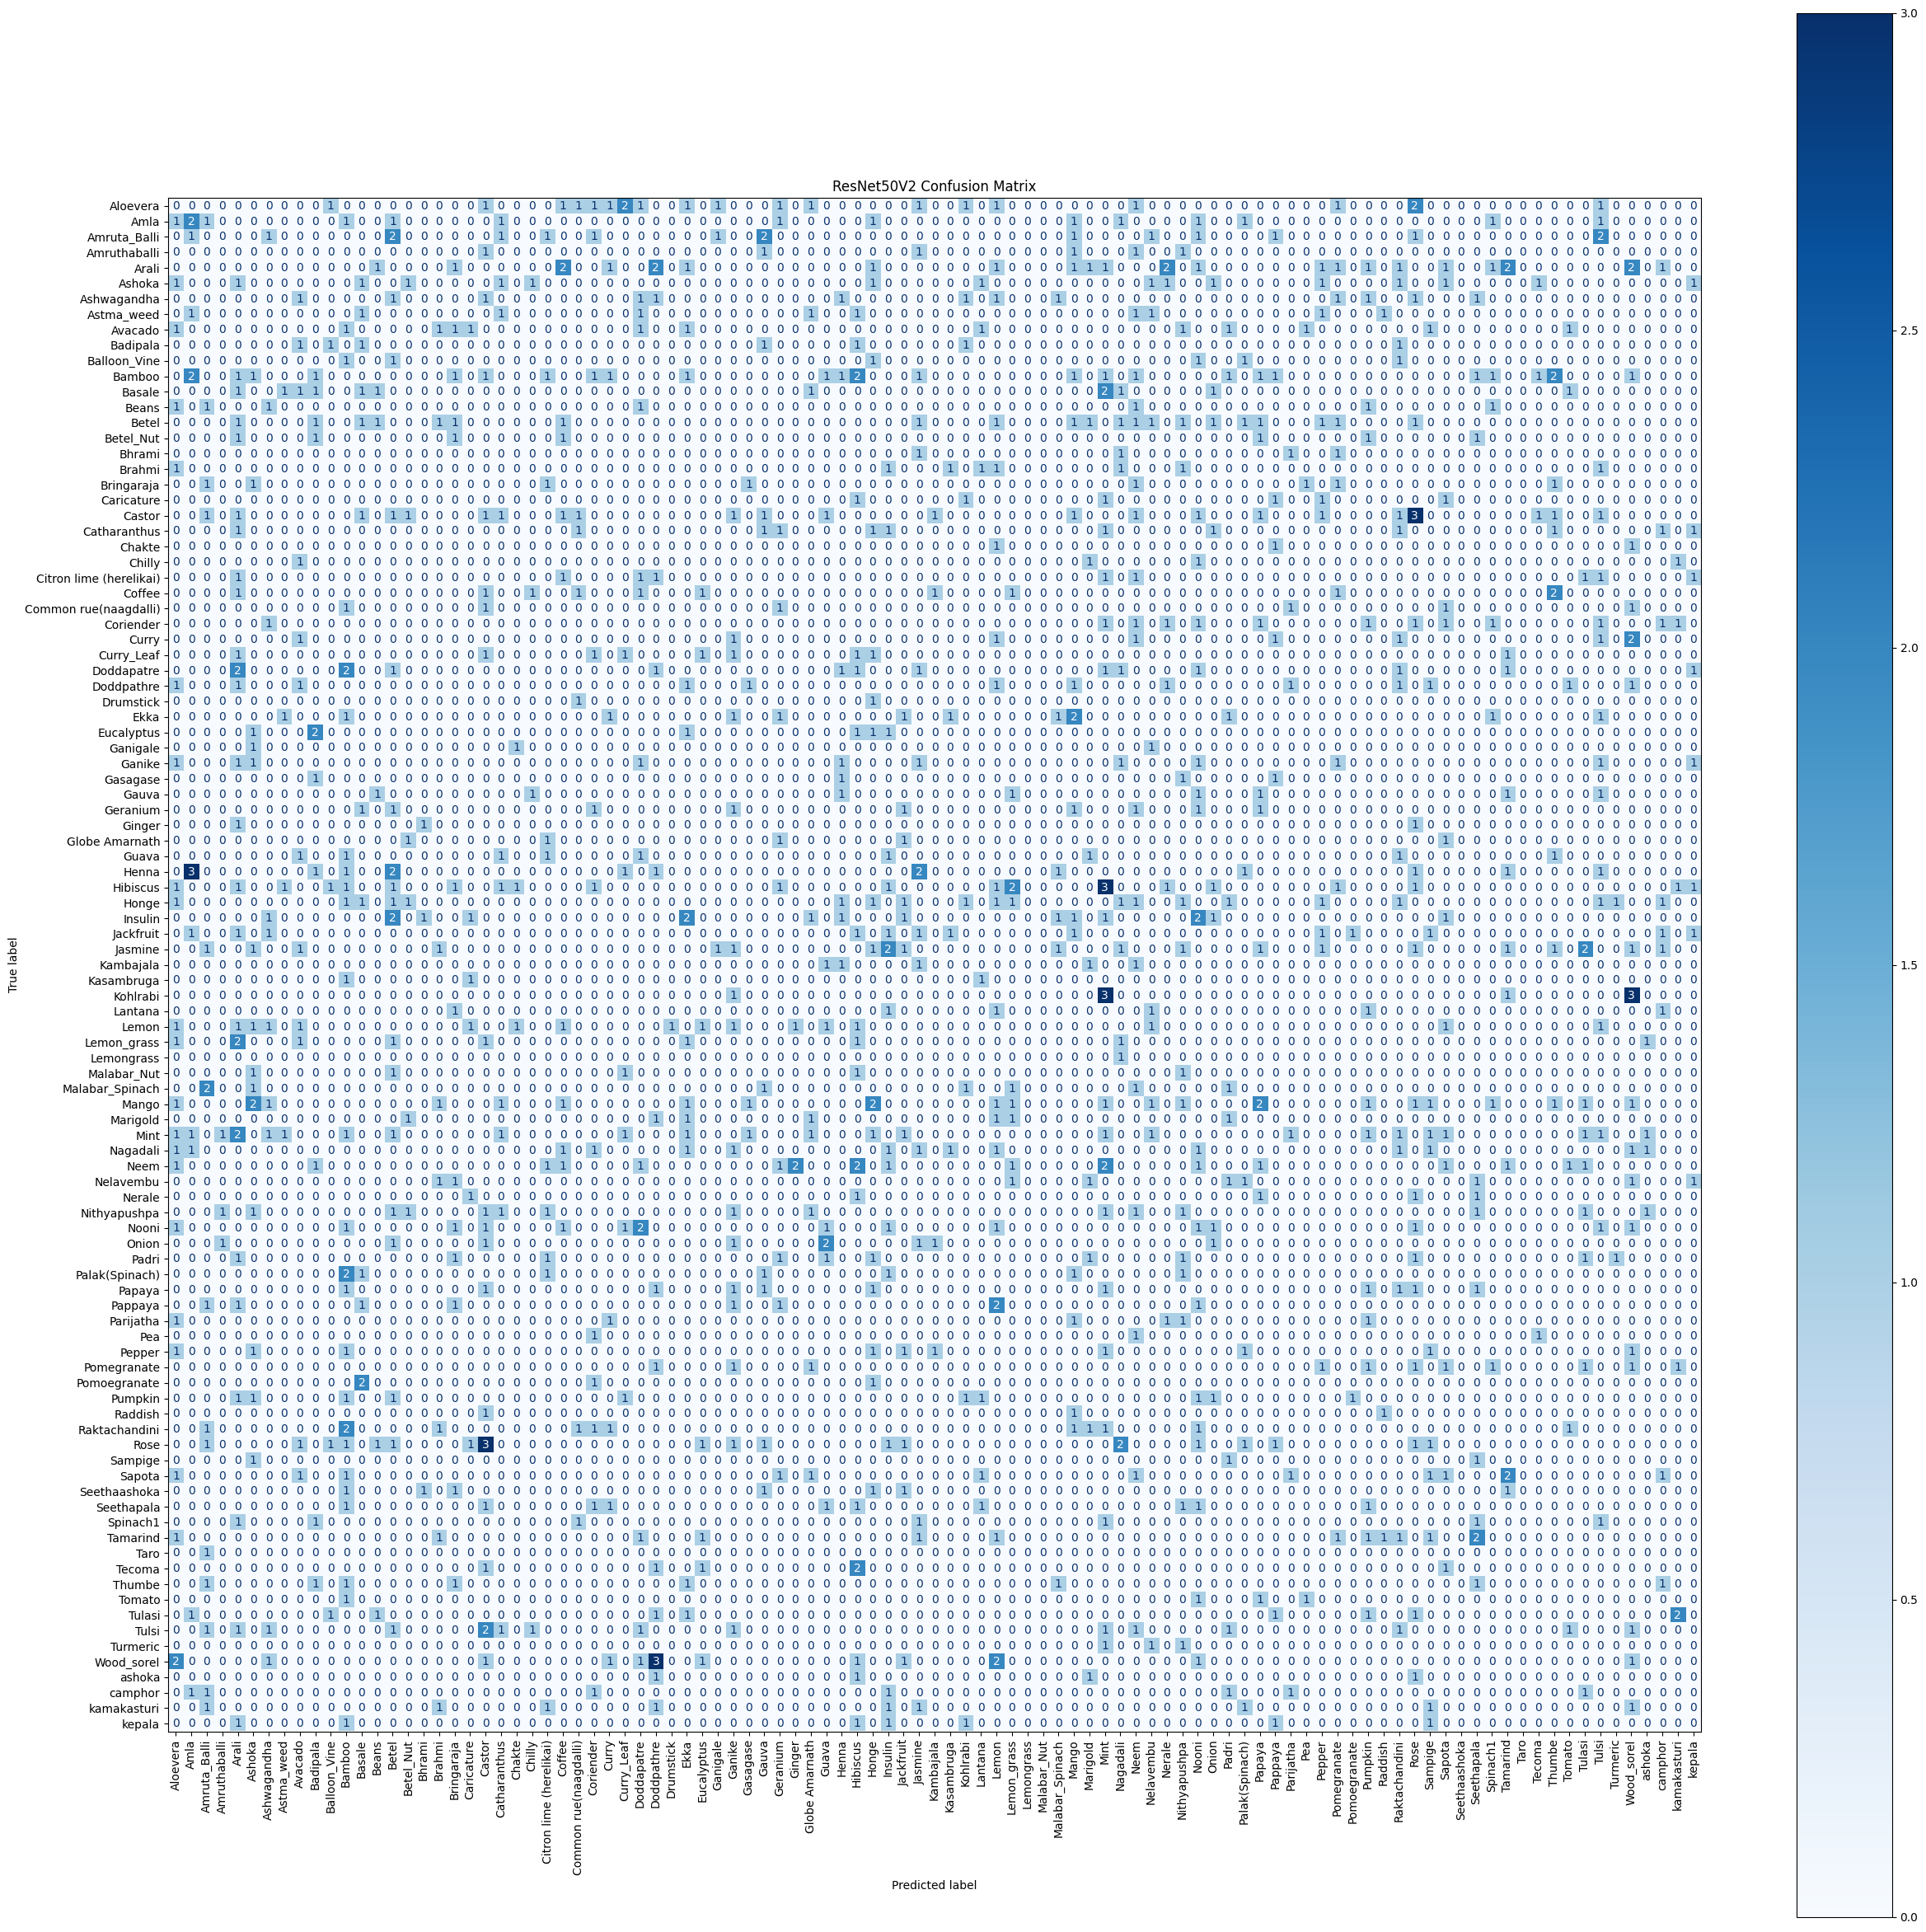

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved ResNet50V2 model to saved_models/ResNet50V2_saved.h5


In [ ]:
base_models4 = [
  (ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'ResNet50V2')
]
model_training (base_models4)

29084464/29084464 [==============================] - 1s 0us/step
Training DenseNet121...
Epoch 1/13
293/293 [==============================] - 478s 1s/step - loss: 4.4690 - accuracy: 0.0428 - val_loss: 3.5221 - val_accuracy: 0.2719
Epoch 2/13
293/293 [==============================] - 378s 1s/step - loss: 3.4463 - accuracy: 0.2204 - val_loss: 2.2724 - val_accuracy: 0.5197
Epoch 3/13
293/293 [==============================] - 368s 1s/step - loss: 2.5508 - accuracy: 0.4054 - val_loss: 1.6422 - val_accuracy: 0.6225
Epoch 4/13
293/293 [==============================] - 375s 1s/step - loss: 1.8761 - accuracy: 0.5464 - val_loss: 1.2154 - val_accuracy: 0.7137
Epoch 5/13
293/293 [==============================] - 365s 1s/step - loss: 1.4241 - accuracy: 0.6466 - val_loss: 0.7964 - val_accuracy: 0.8012
Epoch 6/13
293/293 [==============================] - 360s 1s/step - loss: 1.0635 - accuracy: 0.7281 - val_loss: 0.8510 - val_accuracy: 0.7877
Epoch 7/13
293/293 [==============================] -

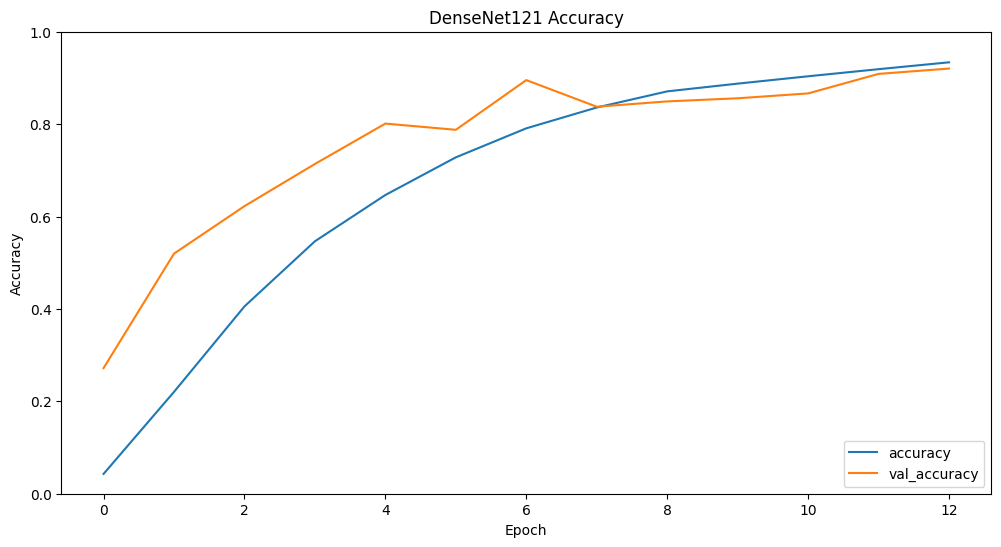

33/33 [==============================] - 25s 688ms/step


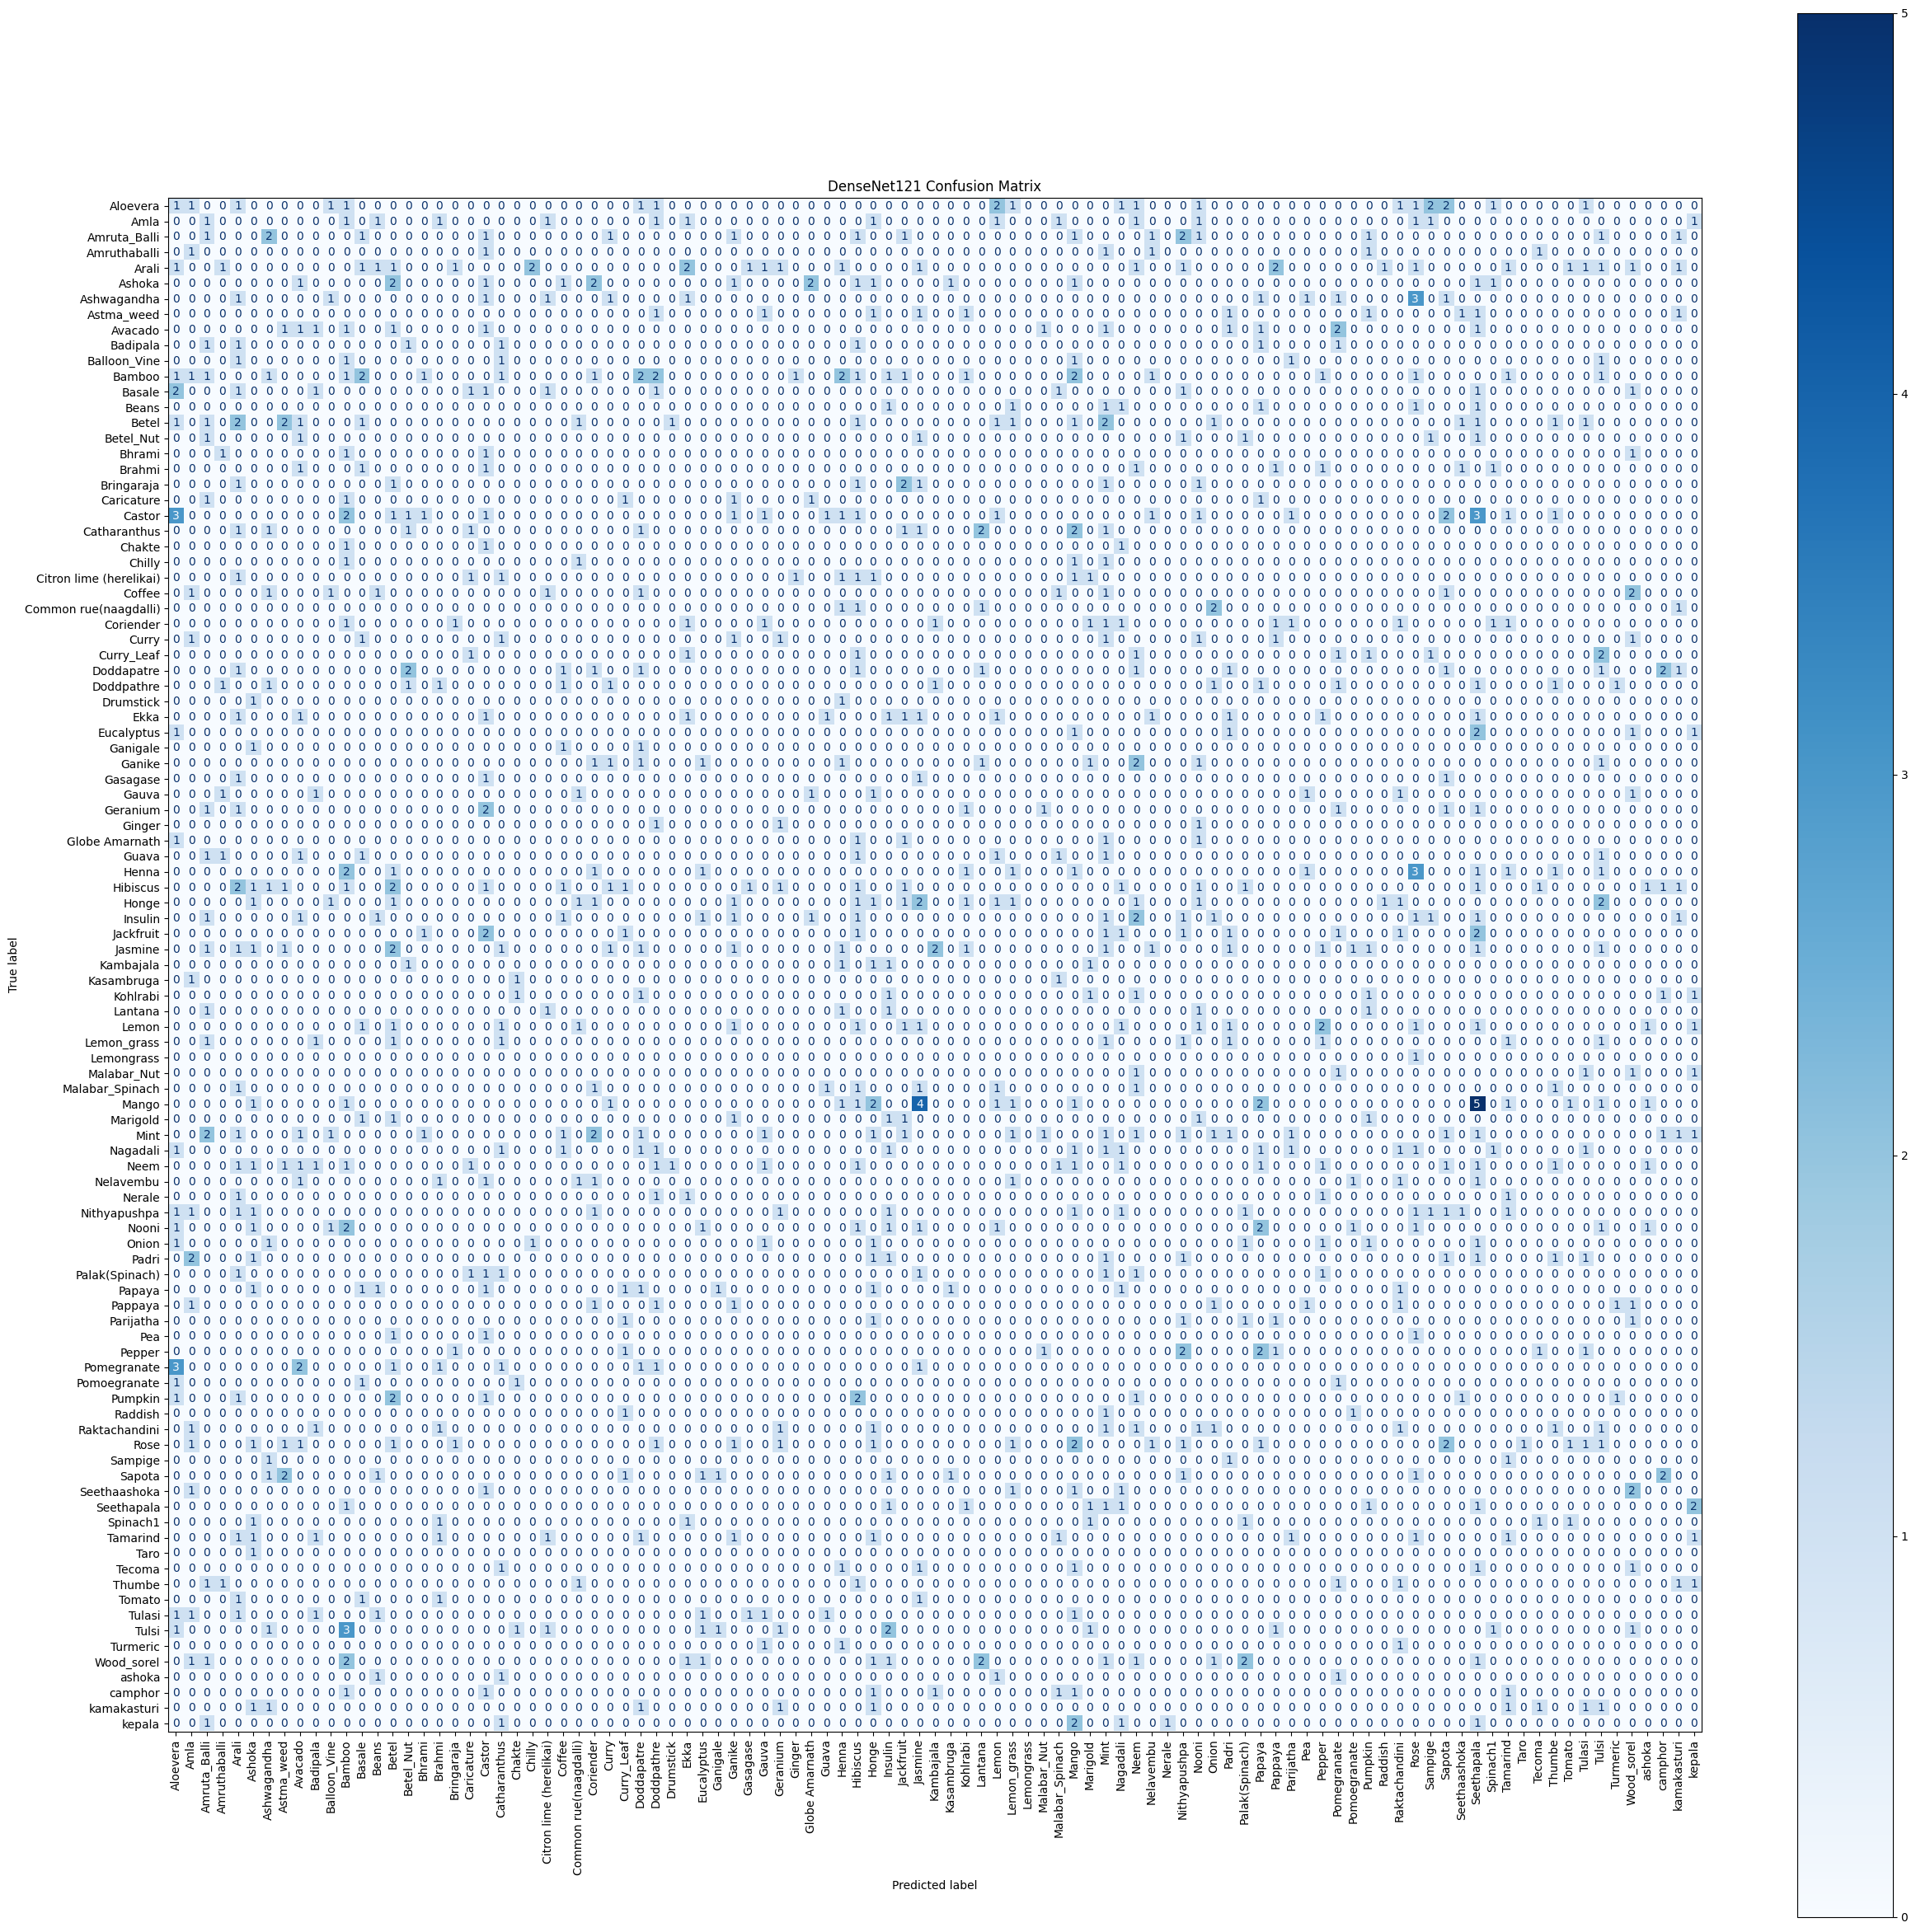

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved DenseNet121 model to saved_models/DenseNet121_saved.h5


In [17]:
# List of base models with their respective input shapes
base_models5 = [
   (DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'DenseNet121')
]
model_training (base_models5)

# Testing and labeling unseen data

In [18]:
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing import image

# Load test dataset
test_df = pd.read_csv('/content/medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/test_data.csv')

# Load class indices (assuming you have train_generator with class indices saved)
class_indices_inverse = {v: k for k, v in train_generator.class_indices.items()}

# Directory containing the saved models
model_dir = '/content/saved_models'

# Define batch size
batch_size = 32

# Function to process images in batches
def process_images_in_batches(image_paths, model, target_size, batch_size):
    num_images = len(image_paths)
    num_batches = (num_images + batch_size - 1) // batch_size  # Calculate number of batches

    all_predictions = []

    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, num_images)
        batch_paths = image_paths[start_idx:end_idx]

        batch_images = []
        for img_path in batch_paths:
            img = image.load_img(img_path, target_size=target_size)
            img = image.img_to_array(img)
            img = img / 255.0
            batch_images.append(img)

        batch_images = np.array(batch_images)
        batch_predictions_probs = model.predict(batch_images)
        batch_predictions = np.argmax(batch_predictions_probs, axis=1)

        all_predictions.extend(batch_predictions)

    return all_predictions

# Iterate over each model file in the directory
for model_file in os.listdir(model_dir):
    if model_file.endswith('.h5'):
        # Load the model
        model_path = os.path.join(model_dir, model_file)
        model = load_model(model_path)

        # Determine target size based on model
        if "Xception_saved" in model_file or "InceptionV3_saved" in model_file:
            target_size = (299, 299)
        else:
            target_size = (224, 224)

        # Process images in batches and make predictions
        image_paths = test_df['Image_Path'].tolist()
        prediction = process_images_in_batches(image_paths, model, target_size, batch_size)

        # Map predictions to class labels
        prediction_labels = [class_indices_inverse[label] for label in prediction]

        # Create a DataFrame with predictions
        predicted_df = pd.DataFrame({
            'Image_Path': test_df['Image_Path'],
            'Label': prediction_labels,
        })

        # Save predictions to CSV
        csv_path = f'/content/saved_models/predicted_{model_file.split(".")[0]}.csv'
        predicted_df.to_csv(csv_path, header=True, index=False)

        print(f"Predictions saved to {csv_path}")

1/1 [==============================] - 6s 6s/step
Predictions saved to /content/saved_models/predicted_DenseNet121_saved.csv


# image label and prediction and visualization

Predictions using: predicted_Xception_saved


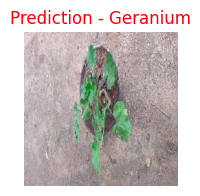

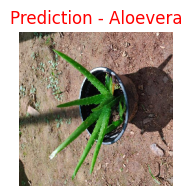

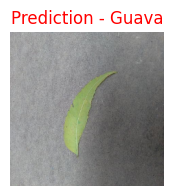

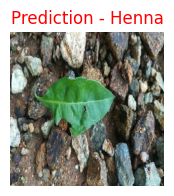

Predictions using: predicted_InceptionV3_saved


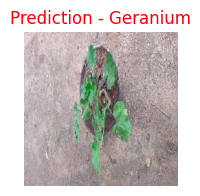

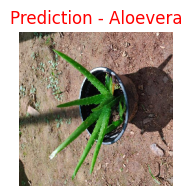

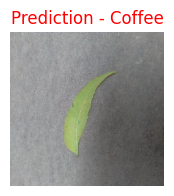

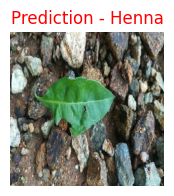

Predictions using: predicted_DenseNet121_saved


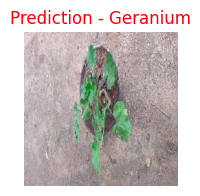

Filename not found: /content/medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Aloevera/4282.jpg


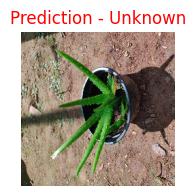

Filename not found: /content/medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset/Neem/1072.jpg


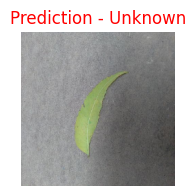

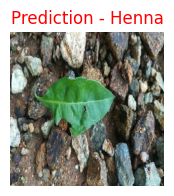

Predictions using: predicted_MobileNetV2_saved(1)


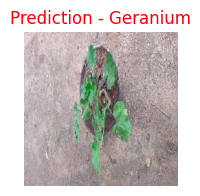

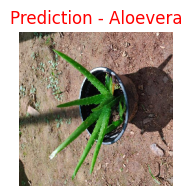

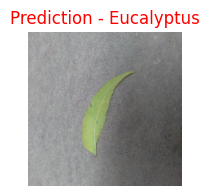

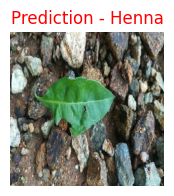

Predictions using: predicted_ResNet50V2_saved


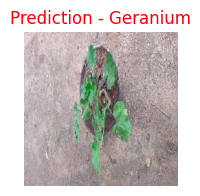

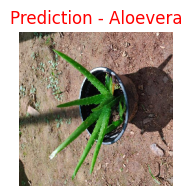

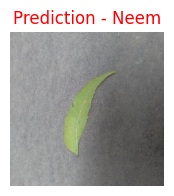

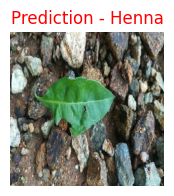

In [19]:
import csv
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Example usage
filenames = [
    '/content/medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Geranium/1095.jpg',
    '/content/medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Aloevera/4282.jpg',
    '/content/medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset/Neem/1072.jpg',
    '/content/medicinal-plants-dataset/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset/Henna/448.jpg'
]

def load_predicted_labels(csv_file_path):
    predicted_labels = {}
    with open(csv_file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            predicted_labels[row['Image_Path']] = row['Label']
    return predicted_labels

def visualize_predictions(filenames, predicted_labels):
    for filename in filenames:
        img = image.load_img(filename, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_processed = img_array / 255.0  # Normalize the image

        # Check if the filename is in predicted_labels
        if filename in predicted_labels:
            predicted_class_name = predicted_labels[filename]
        else:
            print(f"Filename not found: {filename}")
            predicted_class_name = "Unknown"  # Handle cases where filename not found

        plt.figure(figsize=(2, 2))
        plt.imshow(img_processed)  # Display the processed image
        plt.title(f"Prediction - {predicted_class_name}", size=12, color='red')
        plt.axis('off')  # Hide axes
        plt.show()

# Directory containing the predicted CSV files
csv_dir = '/content/saved_models'

# Iterate over each CSV file in the directory
for csv_file in os.listdir(csv_dir):
    if csv_file.startswith('predicted_') and csv_file.endswith('.csv'):
        # Determine the model name
        model_name = csv_file.split('.')[0]

        # Path to the CSV file containing predictions for the current model
        predicted_csv_file = os.path.join(csv_dir, csv_file)

        # Load predicted labels from the CSV file
        predicted_labels = load_predicted_labels(predicted_csv_file)

        # Predict and plot images using predicted labels
        print(f"Predictions using: {model_name}")
        visualize_predictions(filenames, predicted_labels)
